# Telco Customer Churn
### Dibuat Oleh Tim BETA : Rifat Al Kausar & Syahid Ahmad Mukrim

Berikut merupakan gambaran umum dari projek akhir ini:

A. Pemahaman Terhadap Masalah Bisnis

B. Pemahaman Data

C. Exploratory Data Analysis (EDA)

D. Pre-processing

E. Analisa Data

F. Machine Learning

G. Kesimpulan

H. Rekomendasi dan Saran

## **A. Pemahaman Terhadap Masalah Bisnis**

**Konteks**

Dalam industri telekomunikasi, customer memiliki kebebasan untuk memilih di antara sejumlah penyedia layanan yang berbeda untuk memenuhi kebutuhan mereka. Sebuah perusahaan telekomunikasi Telco tertarik untuk mengidentifikasi customer yang mungkin akan berhenti berlangganan (churn). Perusahaan berupaya merancang strategi yang efektif guna mempertahankan customer yang telah berlangganan, sehingga meminimalkan tingkat churn dan meningkatkan retensi customer. Peningkatan retensi customer itu penting karena proses memperoleh customer baru membutuhkan biaya lima hingga tujuh kali lebih mahal daripada mempertahankan customer lama (sumber: [Forbes](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/?sh=29fef7c81c7d)). Statistik menunjukkan peningkatkan tingkat retensi customer sebesar 5% meningkatkan keuntungan sebesar 25% hingga 95% (sumber: [Harvard Business School](https://hbswk.hbs.edu/archive/the-economics-of-e-loyalty)).

**Pernyataan Masalah**

Selama ini tim pemasaran memberikan promo diskon secara merata kepada semua customer yang ada untuk mempertahankan mereka agar tidak berhenti menggunakan jasa layanan telekomunikasi. Dengan cara tersebut, tim pemasaran mengeluarkan anggaran cukup besar yang membuat biaya promo diskon menjadi membengkak dan melebihi budget. Oleh karena itu, tim pemasaran ingin mengetahui faktor apa saja yang mempengaruhi customer yang berhenti berlangganan atau churn berdasarkan data historis. Selanjutnya, tim pemasaran ingin mengetahui bagaimana cara untuk memprediksi pelanggan yang ada apakah akan churn atau tidak. Dengan mengetahui hal-hal tersebut tim pemasaran dapat membuat promosi yang prioritasnya hanya kepada customer yang akan churn, sehingga dapat meminimumkan anggaran promosi yang dikeluarkan.


**Tujuan**

1. Tim pemasaran dapat mengetahui faktor-faktor apa saja yang mempengaruhi customer untuk berhenti berlangganan / churn.
2. Perusahaan dapat membuat sebuah model machine learning untuk memprediksi customer yang akan berhenti berlangganan atau tidak. Dengan demikian, tim pemasaran dapat membuat promosi yang prioritasnya hanya kepada customer yang akan churn sehingga dapat meminimumkan anggaran promosi yang dikeluarkan.

### A.1 Pendekatan Analitis
**A. Analisis Data**

Perusahaan bertujuan **memahami perilaku customer** yang berhenti berlangganan (churn) dan yang tidak. Untuk memahami customer, analisis akan dibagi ke dalam 3 kategori:
1. Demografi Customer: Meliputi faktor-faktor seperti jenis kelamin (`gender`), status senior (`SeniorCitizen`), status pernikahan (`partner`), dan jumlah tanggungan (`dependents`).
2. Jenis Layanan yang Dimiliki oleh Customer: Meliputi layanan-layanan seperti layanan telepon (`phoneService`), `multiple lines`, layanan internet (`InternetService`), keamanan online (`OnlineSecurity`), cadangan daring (`OnlineBackup`), dukungan teknis (`TechSupport`), layanan `Streaming TV`, dan `Streaming Movies`.
3. Informasi Customer: Menyertakan informasi mengenai jenis kontrak (`Contract`), tagihan tanpa kertas (`paperlessBilling`), metode pembayaran (`PaymentMethod`), biaya bulanan (`MonthlyCharges`), dan total biaya (`TotalCharges`).

**B. Machine Learning**

Dikarenakan dataset yang digunakan memiliki target kelas dan target kelas tersebut merupakan data kategorikal, maka kami akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang customer akan churn atau tidak berdasarkan riwayat data sebelumnya.

### A.2 Evaluasi Metrik
Target (Churn) :

0 (No)  : Customer lanjut berlangganan (Retained)

1 (Yes) : Customer berhenti berlangganan (Churned)

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" alt="Gambar" width="500">

- TP : Jumlah customer yang memang benar berhenti berlangganan (Churned)
- TN : Jumlah customer yang memang benar lanjut berlangganan  (Retained)

Type of Error:
- Type 1 erorr (FP) : False Positive ( Customer diprediksi akan churn, padahal aktualnya mereka tidak churn )

Konsekuensi: Dana promosi yang dikeluarkan kepada customer tersebut, seharusnya dapat digunakan untuk biaya operasional lain

- Type 2 error (FN) : False Negative ( Customer diprediksi tidak churn, padahal aktualnya mereka churn)

Konsekuensi: Perusahaan perlu mengeluarkan dana yang lebih besar untuk mengakusisi kembali customer tersebut atau menambah customer baru.


Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang harus mempertimbangkan untuk mengurangi Type Error 1 (False Positive) dan Type Error 2 (False Negative). Namun, lebih memfokuskan kepada FN karena mengeluarkan biaya yang lebih besar. Jadi nanti metrik utama yang akan kita gunakan adalah F2 ([F2 Score](https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/scorers.html#:~:text=The%20F2%20score%20is%20the,to%20recall%20than%20to%20precision.)).


In [1]:
# Library

import pandas as pd
import numpy as np


# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import missingno as msno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder, OrdinalEncoder
import category_encoders as ce

# Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from catboost import CatBoostClassifier

# Metric Score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import make_scorer, fbeta_score
f2_score = make_scorer(fbeta_score, beta=2)

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## **B. Pemahaman Data**

Sumber dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [2]:
#Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### B.1 Informasi Atribut

| **Attribute** | **Data Type** | **Description** |
| -- | -- | -- |
| customerID | Object | ID pelanggan
| gender | Object | Jenis kelamin pelanggan
| SeniorCitizen | Integer | Apakah pelanggan berumur lebih dari 65 (senior) atau tidak|
| Partner | Object | Apakah pelanggan memiliki pasangan?
| Dependents | Object | Apakah pelanggan memiliki tanggungan?
| Tenure | Integer | Lama pelanggan bekerja
| PhoneService | Object | Apakah pelanggan memiliki layanan telepon?
| MultipleLines | Object | Apakah pelanggan memiliki beberapa saluran atau tidak? |
| InternetService | Object | Apakah pelanggan memiliki internet? |
| OnlineSecurity | Object | Apakah pelanggan memiliki keamanan online? |
| OnlineBackup | Object | Apakah pelanggan memiliki cadangan daring atau tidak? |
| TechSupport | Object | Apakah pelanggan memiliki bantuan teknologi? |
| StreamingTV | Object | Apakah pelanggan memiliki layanan TV streaming? |
| StreamingMovies | Object | Apakah pelanggan memiliki layanan streaming film? |
| Contract | Object | Jangka waktu kontrak |
| PaperlessBilling | Object | Apakah pelanggan menggunakan tagihan tanpa kertas? |
| PaymentMethod | Object | Pilihan cara pembayaran |
| MonthlyCharges | Float | Jumlah yang ditagihkan kepada pelanggan setiap bulan |
| TotalCharges | Object | Total jumlah tagihan |
| Churn | Object | Apakah pelanggan berhenti berlangganan atau tidak? |

### B.2 Analisis Unit
Customer Telco dengan masing-masing `customerID`
### B.3 Label
`Churn` : Customer yang berhenti berlangganan (Yes) atau tetap berlangganan (No)
### B.4 Fitur
- Layanan yang telah didaftarkan oleh setiap customer – `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` dan `StreamingMovies`
- Informasi akun customer – `tenure`, `Contract`, `PaymentMethod`, `PaperlessBilling`, `MonthlyCharges`, dan `TotalCharges`
- Informasi demografis tentang customer – `gender`, `SeniorCitizen`, `Partner`, dan `Dependents`


Catatan :

- Terdiri dari 7043 baris dan 21 kolom (fitur)
- Pada dataset terdapat tipe data Objek sebanyak 17 kolom, dan Numerik (Integer/ Float) sebanyak 3 kolom.
- Setiap baris mewakili customer dan setiap kolom mewakili atribut pelanggan
- Pada kolom TotalCharges seharusnya tipe data berupa `float`, perlu diubah sebelum analisis lebih lanjut

In [4]:
# Merubah kolom 'TotalCharges' menjadi float dan handle non-float values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Mendeteksi non-float values pada kolom 'TotalCharges'
non_float_rows = df[pd.isna(df['TotalCharges'])]

In [5]:
non_float_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tipe data kolom `TotalCharges` sudah sesuai, namun terdapat missing value yang harus dihandling nanti

## **C. Exploratory Data Analysis (EDA)**
Untuk memahami distribusi data dan kondisinya sebelum tahap pre-processing

### C.1 Fitur Numerikal

In [7]:
# Mengetahui fitur yang numerikal

num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O'))]
num_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [8]:
# Menghapus kolom `SeniorCitizen`, meskipun angka tetapi merupakan data kategorikal yang berisi : 1 (SeniorCitizen) dan 0 (Bukan)
num_features.remove('SeniorCitizen')
num_features

['tenure', 'MonthlyCharges', 'TotalCharges']

#### C.1.1 Pemeriksaan Distribusi

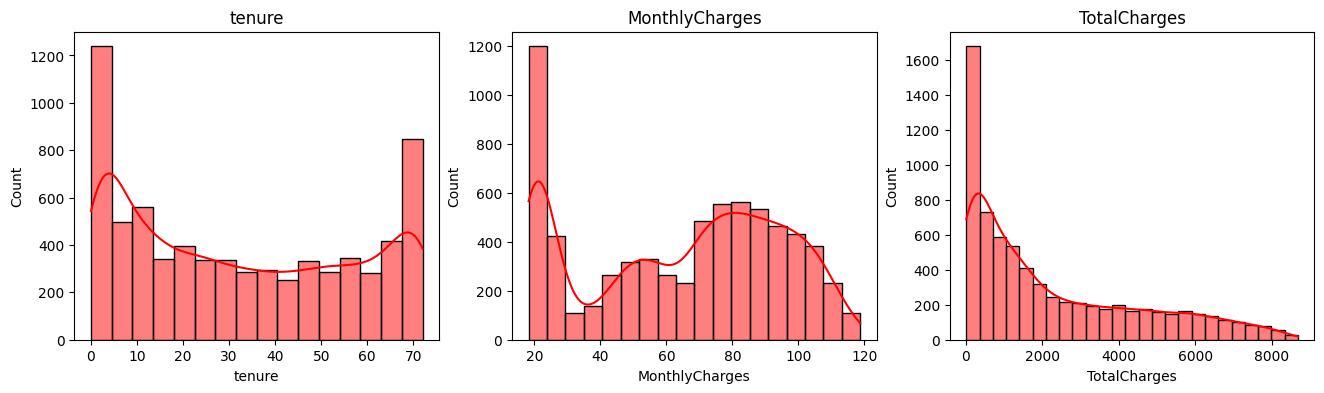

In [9]:
plotnumber = 1

plt.figure(figsize=(16,4))

for cols in num_features:
    plt.subplot(1, 3, plotnumber)
    sns.histplot(data=df, x=cols, kde=True, color='red')
    plt.title(cols)
    plotnumber = plotnumber + 1
plt.show;

In [10]:
# cek anomali sebaran
df[num_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Ketiga fitur `tenure`, `MonthlyCharges`, dan `TotalCharges` distribusinya tidak normal.
- Terdapat pada `tenure` yang bernilai 0 ketika di check ternyata semua baris yang bernilai 0 terdapat missing value pada `TotalCharge`. Baris data tersebut nantinya akan dicheck terkait missing valuenya.

#### C.1.2 Pemeriksaan Korelasi
dikarenakan ketiga fitur numerik sebarannya tidak terdistribusi normal, pengecekan korelasi menggunakan **metode spearman**

In [12]:
# Check the correlation between numerical variables

def plot_cor_num(feature):
    correlations = df[feature].corr(method='spearman')

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Spearman Correlation Heatmap')
    plt.show()

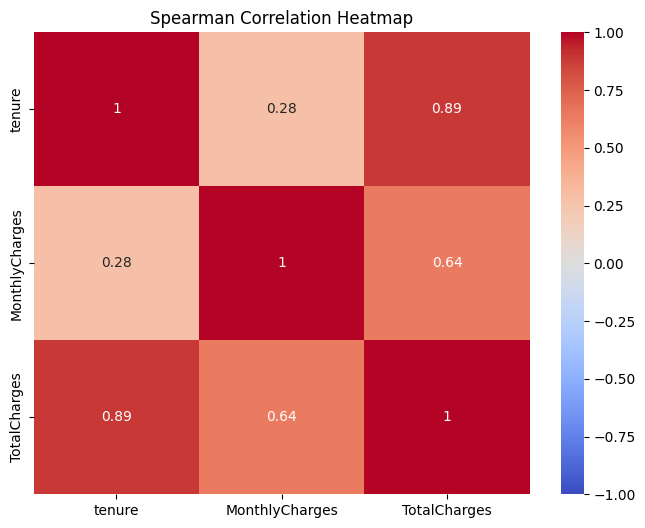

In [13]:
plot_cor_num(num_features)

- Korelasi antara `tenure` dengan `TotalCharges` positif dan sangat kuat, hal ini disebabkan karena semakin lamanya customer yang berlangganan, semakin besar juga Jumlah Biaya yang dibayarkan
- Korelasi antara `MonthlyCharges` dengan `tenure` positif dan kuat, dikarenakan mungkin customer yang sudah lama berlangganan memmiliki kepercayaan terhadap produk-produk di Telco sehingga dia berlangganan beberapa produk. Dengan demikian, jumlah biaya bulanan yang dibayarkan juga semakin besar
- Korelasi `TotalCharges` dengan `MonthlyCharges` positif dan lemah. Hal tersebut menjelaskan bahwa belum tentu customer yang memiliki `TotalCharges` yang besar, biaya bulanannya (`MonthlyCharges`) juga besar. Karena dapat dilihat `TotalCharges` itu lebih berhubungan kuat dengan lamanya seseorang berlangganan.
- Total Charges kemungkinan besar dibuang untuk menghindari multicolinearitas pada model. Nantinya akan diuji lebih lanjut

[Segmentasi kuatnya korelasi dalam suatu selang](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression)

### C.2 Fitur Kategorikal

In [14]:
# Fungsi mengubah senior citizen 1 menjadi yes dan 0 menjadi 0 agar sesuai dengan kolom kategorikal lainnya
def seniorYesNo(x):
    if x == 0:
        return "No"
    else:
        return "Yes"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(seniorYesNo)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') & (feature != 'Churn') & (feature != 'customerID' ))]
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

#### C.2.1 Pemeriksaan Kardinalitas Data dan Jenis Kategorikal (Ordinal / Nominal)

In [16]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in cat_features :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,gender,2,"[Female, Male]"
1,SeniorCitizen,2,"[No, Yes]"
2,Partner,2,"[Yes, No]"
3,Dependents,2,"[No, Yes]"
4,PhoneService,2,"[No, Yes]"
5,MultipleLines,3,"[No phone service, No, Yes]"
6,InternetService,3,"[DSL, Fiber optic, No]"
7,OnlineSecurity,3,"[No, Yes, No internet service]"
8,OnlineBackup,3,"[Yes, No, No internet service]"
9,DeviceProtection,3,"[No, Yes, No internet service]"


- Terdapat 16 kolom data kategorikal, dengan unique value terbanyak pada kolom `PaymentMethod`.
- Kategorikal (Nominal) : `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`,  `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingTV`, `PaperlessBilling`, `PaymentMethod`
- Kategorikal (Ordinal) : `Contract`

#### C.2.2 Pemeriksaan Korelasi Crammer V antar Fitur Kategorikal dan juga dengan Label Churn

In [17]:
# menambahkan label churn
cat_features_label = cat_features+['Churn']

In [18]:
cat_features_label

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [19]:
# Mengganti No internet service dengan No karena definisi yang sama
df[['OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
    'StreamingMovies']] = df[['OnlineSecurity', 'OnlineBackup',
                            'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies']].replace(
                                                  {'No internet service' : 'No'})

In [20]:
# Mengganti No Phone service dengan No karena definisi yang sama
df['MultipleLines'] = df['MultipleLines'].replace(
                                                  {'No phone service' : 'No'})

In [21]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in cat_features :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,gender,2,"[Female, Male]"
1,SeniorCitizen,2,"[No, Yes]"
2,Partner,2,"[Yes, No]"
3,Dependents,2,"[No, Yes]"
4,PhoneService,2,"[No, Yes]"
5,MultipleLines,2,"[No, Yes]"
6,InternetService,3,"[DSL, Fiber optic, No]"
7,OnlineSecurity,2,"[No, Yes]"
8,OnlineBackup,2,"[Yes, No]"
9,DeviceProtection,2,"[No, Yes]"


Else condition Met:  0.9997159640597721
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.01171031565512069
Else condition Met:  0.006289814101771346
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.9994773659911618
Else condition Met:  0.010816802915114419
Else condition Met:  0.2104424104659617
Else condition Met:  0.0
Else condition Met:  0.14206931825799893
Else condition Met:  0.2648070602618791
Else condition Met:  0.03632448899070073
Else condition Met:  0.06508961980243944
Else condition Met:  0.05781163292521059
Else condition Met:  0.059013179839554036
Else condition Met:  0.1043105966006519
Else condition Met:  0.11919519285411277
Else condition Met:  0.14288

Else condition Met:  0.16389825806921432
Else condition Met:  0.0
Else condition Met:  0.1043105966006519
Else condition Met:  0.12381034208581423
Else condition Met:  0.011032770423111437
Else condition Met:  0.018589636120909973
Else condition Met:  0.2565977587975424
Else condition Met:  0.4426898217665556
Else condition Met:  0.1754928803057744
Else condition Met:  0.2815673066484549
Else condition Met:  0.39041266790681006
Else condition Met:  0.27751259846061394
Else condition Met:  0.9996999374130922
Else condition Met:  0.5326988670848484
Else condition Met:  0.11105202063954982
Else condition Met:  0.22324200592885424
Else condition Met:  0.2525003712610743
Else condition Met:  0.061762410903152945
Else condition Met:  0.0
Else condition Met:  0.11919519285411277
Else condition Met:  0.11652075951360855
Else condition Met:  0.03758139287584904
Else condition Met:  0.03020233351921179
Else condition Met:  0.2581999473571393
Else condition Met:  0.44263513545995453
Else conditio

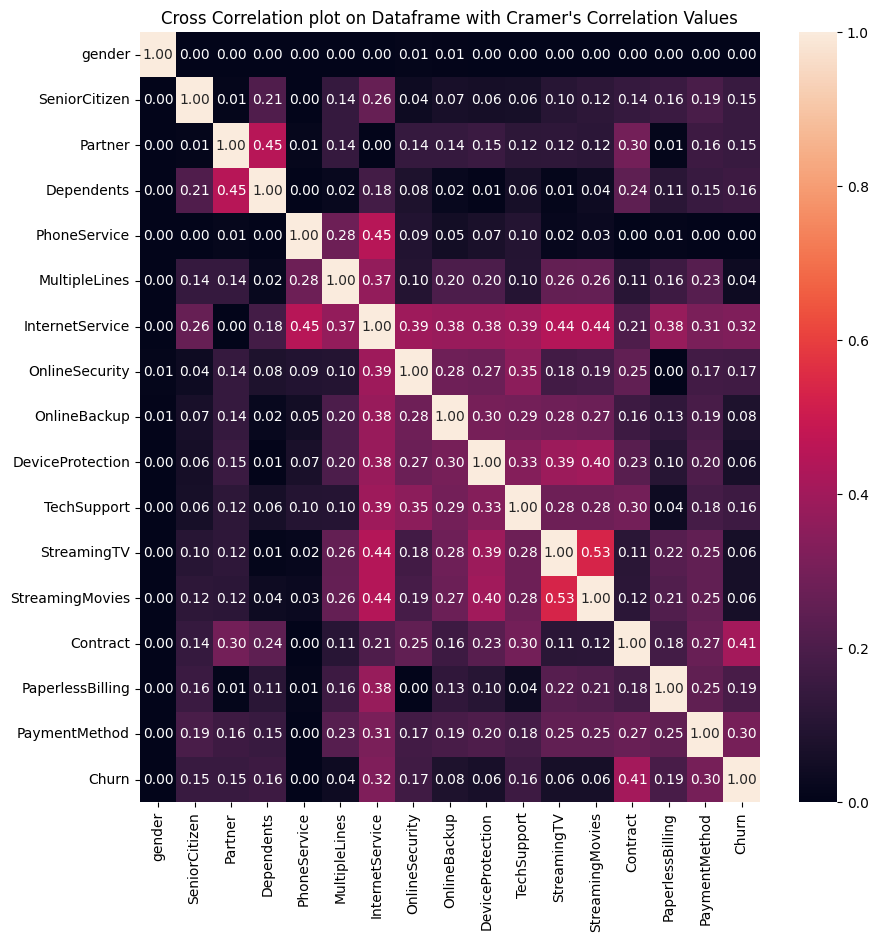

In [22]:
from scipy.stats import chi2_contingency

def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v
def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(10,10))
    sns.heatmap(cramer,annot=True,fmt='.2f')

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()

plot_cramer(df[cat_features_label])

Korelasi antar fitur kategorikal tidak ada yang terlalu tinggi. Fitur - fitur cenderung memiliki korelasi lemah ke sedang. Fitur yang memiliki korelasi sangat lemah (<0.1) akan menjadi pertimbangan dalam feature selection.

### C.3 Pemeriksaan Missing Value

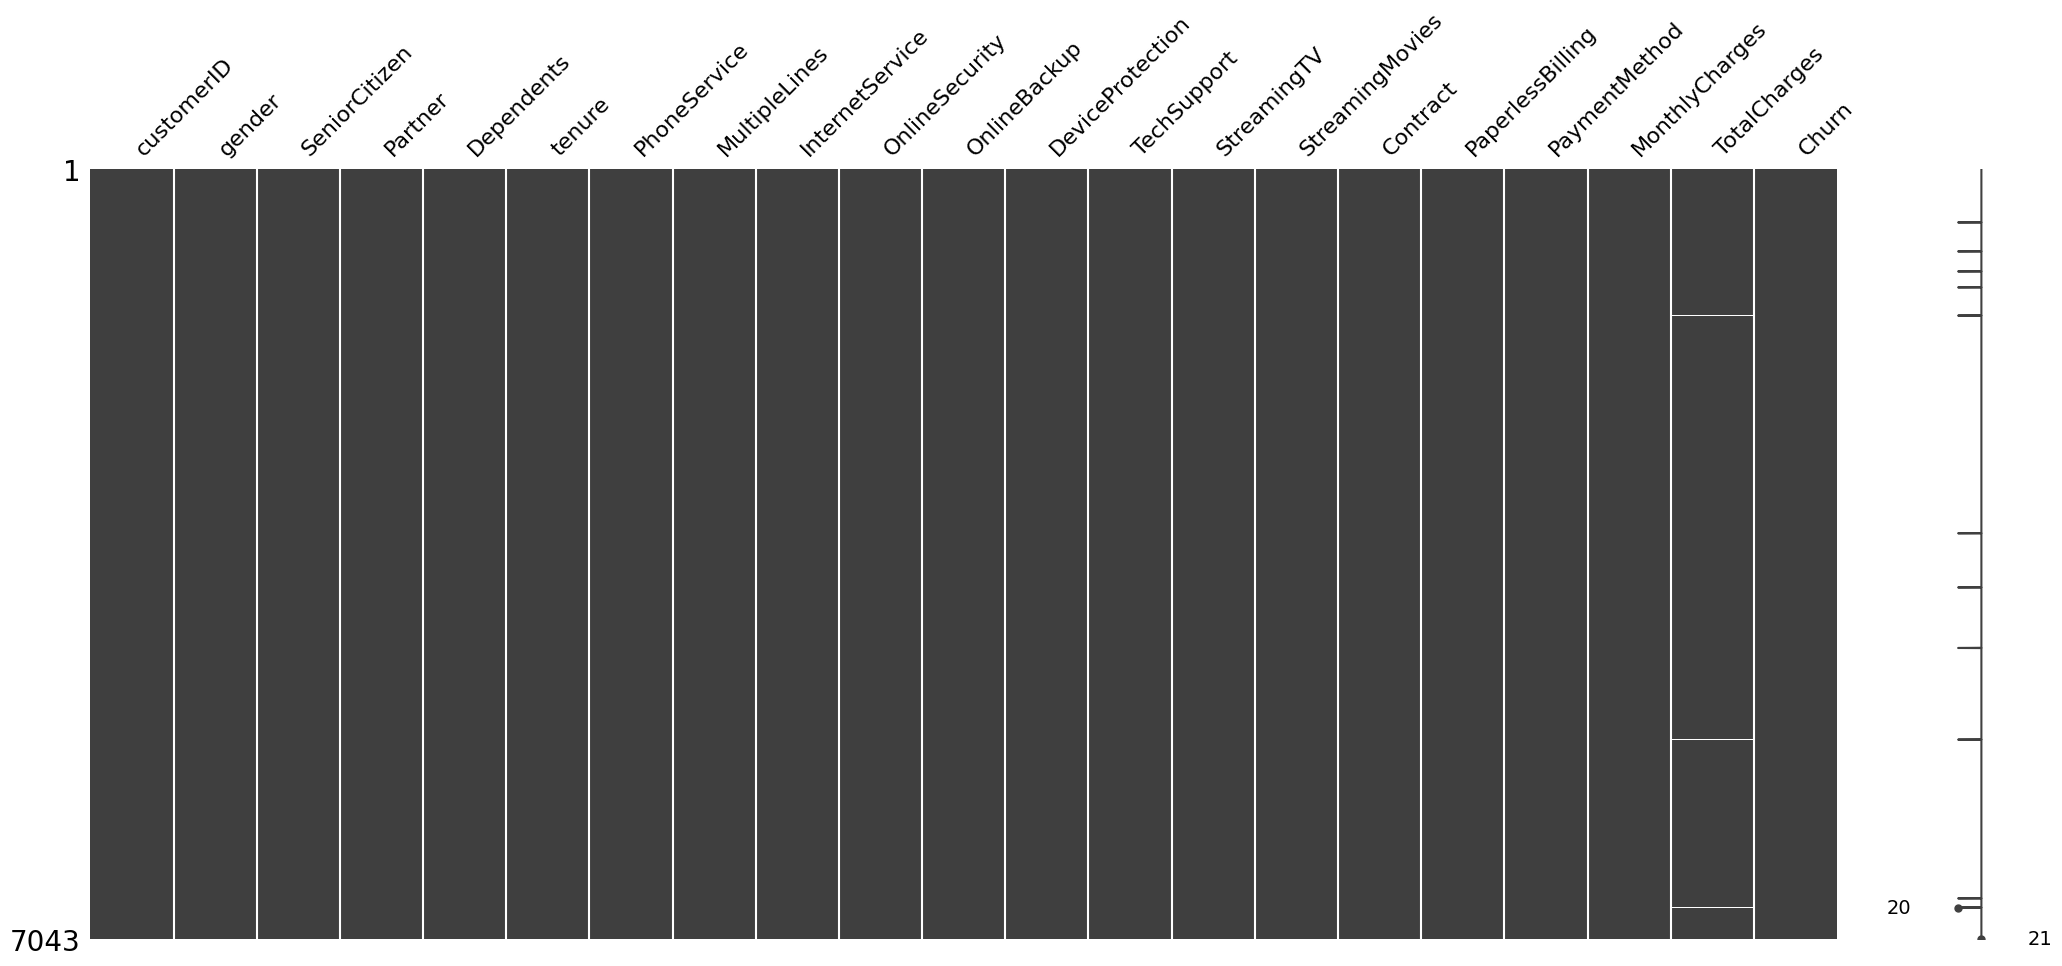

In [23]:
# visualisasi missing value
msno.matrix(df);

In [24]:
# Persentasi Missing Value per Kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    ])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct%'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct%
0,customerID,object,0,0.00
1,gender,object,0,0.00
2,SeniorCitizen,object,0,0.00
3,Partner,object,0,0.00
4,Dependents,object,0,0.00
5,tenure,int64,0,0.00
6,PhoneService,object,0,0.00
7,MultipleLines,object,0,0.00
8,InternetService,object,0,0.00
9,OnlineSecurity,object,0,0.00


Missing value hanya ada di kolom `TotalCharges` sebesar 0.16%. Missing value terjadi karena data yang diberikan pada kolom `TotalCharges` dilakukan penyesuaian tipe data dan selain tipe data float menjadi NaN/Missing value. Dikarenakan Missing value < 1 % dan ketika dicek sebelumnya pada baris yang terdapat missing value terdapat tenur yang bernilai 0 nantinya akan di drop baris tersebut.

### C.4 Pemeriksaan Outlier

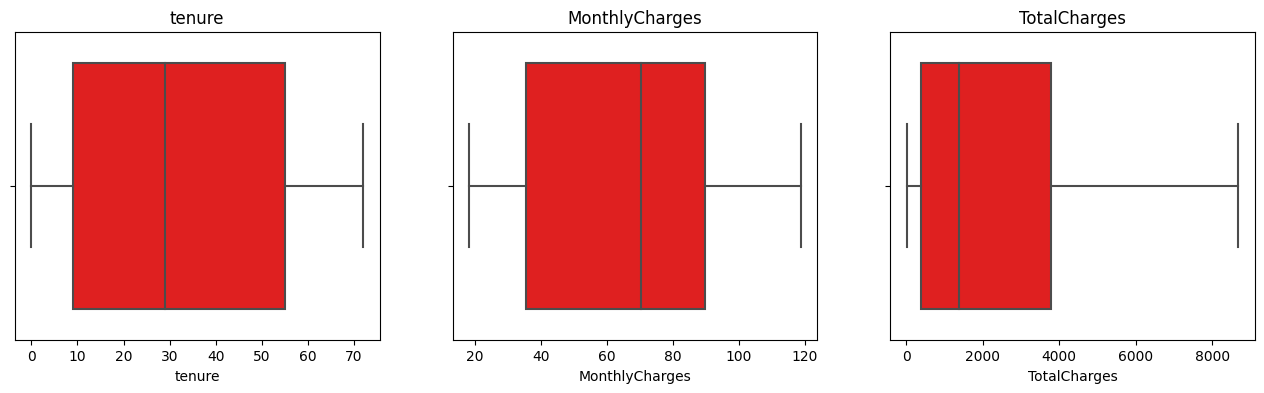

In [25]:
plotnumber = 1

plt.figure(figsize=(16,4))

for cols in num_features:
    plt.subplot(1,3, plotnumber)
    sns.boxplot(data=df, x=cols, color='red')
    plt.title(cols)
    plotnumber = plotnumber + 1
plt.show;

Tidak terdapat outlier pada ketiga fitur numerik.

### C.5 Pemeriksaan Duplikat Data

In [26]:
df.duplicated().sum(), df.duplicated().sum() / len(df)

(0, 0.0)

Tidak terdapat duplikat data, pada dataset terdapat kolom `CustomerID` yang merupakan **primary key**.

### C.6 Pemeriksaan Keseimbangan Label (Churn)

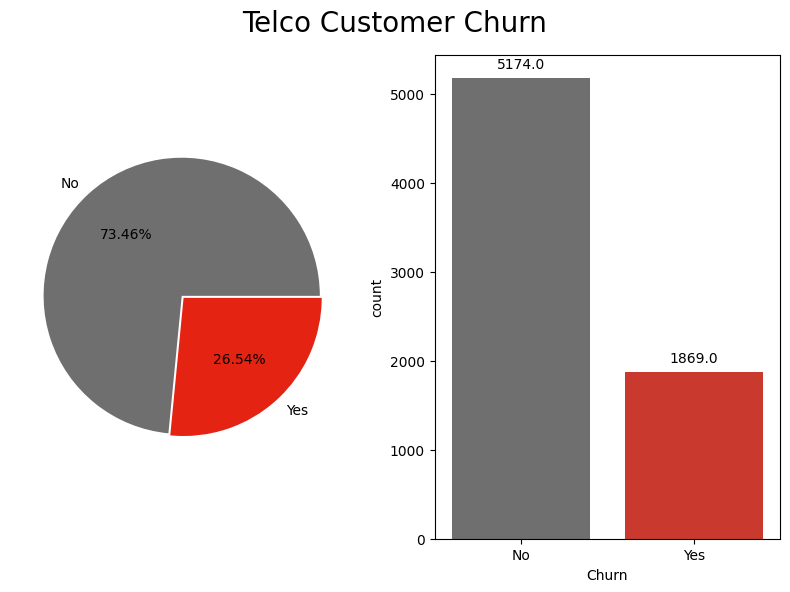

In [27]:
# Churn and Not Churn Proportion
colors = ['#706F6F','#E42313']

plt.figure(figsize=(8,6)).suptitle('Telco Customer Churn', fontsize=20)
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['No','Yes'], colors= ['#706F6F','#E42313'],autopct='%.2f%%',explode=(0.01,0.01))
ax = plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Churn', palette= colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Kolom target (`churn`) memiliki data yang tidak tidak seimbang antara churn dan tidak churn dengan perbandingan mendekati 1:4. Dikarenakan label antara yang churn dan tidak terjadi imbalanced, pada pemodelan nanti akan dicoba beberapa teknik untuk menghandle imbalance tersebut.

## **D. Pre-processing**

Ada data yang hilang/kosong disalah satu fitur/kolom. Selanjutnya, fitur/kolom `customerID` tidak berguna untuk analisis dan modeling. Kita akan memastikan keseluruhan data menjadi siap pakai untuk melakukan analisis terhadap masalahnya dan juga pembuatan model machine learningnya.

### D.1 Penanganan Missing Value
Missing value terdapat pada kolom `TotalCharges` sebanyak 0.16% dari total keselurah baris. Dikarenakan baris yang terdapat missing value < 1 %, maka akan dihapus baris tersebut

In [28]:
# Check baris yang terdapat missing value pada kolom TotalCharges
df[pd.isna(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [29]:
# Menghapus baris yang terdapat Missing Value
df.dropna(subset=['TotalCharges'], inplace=True)

In [30]:
df[pd.isna(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Sudah tidak terdapat missing value pada kolom `TotalCharge`

### D.2 Pemeriksaan Anomali

- `PhoneService` menjadi dasar dari `MultipleLines` dimana seharusnya jika pelanggan tidak mempunya layanan telepon maka dia tidak akan memiliki beberapa saluran telepon.
- `InternetService` menjadi dasar dari layanan : `OnlineSecurity`, `OnlineBackup`, `TechSupport`, `StreamingTV` dan `StreamingMovies`. Dimana tanpa adanya jaringan internet pelanggan seharusnya tidak mempunya akses terhadap layanan yang memerlukan jaringan internet.

In [31]:
df[(df['PhoneService'].str.contains('No')) & (df['MultipleLines'] == 'Yes')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [32]:
dfInternet = df[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']]

# Karena data pada internet service memiliki kategori DSL dan Fiber Optic maka kita ubah data tersebut menjadi Yes yang akan digunakan nanti untuk melihat anomali
def changeValue(x):
    if x != 'No':
        return x
    else:
        return 'Yes'

dfInternet['InternetService'] = dfInternet['InternetService'].apply(changeValue)


In [33]:
# Menghitung jumlah layanan yang dimiliki oleh pelanggan
def totalInternetService(row):
    total = 0
    colsSkip = ['InternetService']
    for col in row.index:
        if col not in colsSkip and row[col] != 'Yes':
            total += 1
    return total

dfInternet['totalInternetService'] = dfInternet.apply(totalInternetService, axis=1)

In [34]:
dfInternet[(dfInternet['InternetService'] == 'No') & (dfInternet['totalInternetService'] >0)]

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,totalInternetService


Setelah kita periksa, bisa dipastikan bahwa tidak adanya anomali pada dataset karena jika pelanggan tidak mempunyai layanan telepon atau layanan internet mereka juga tidak akan memiliki layanan yang dipengaruhi oleh hal tersebut.

## **E. Analisis Data**

### E.1 Analisis Data Antar Fitur

#### E.1.1 ***Demografi*** - Mari pertama-tama kita memahami jenis kelamin (`gender`), status senior (`SeniorCitizen`), status pernikahan (`partner`), dan jumlah tanggungan (`dependents`).

1. ***Distribusi Jenis Kelamin***

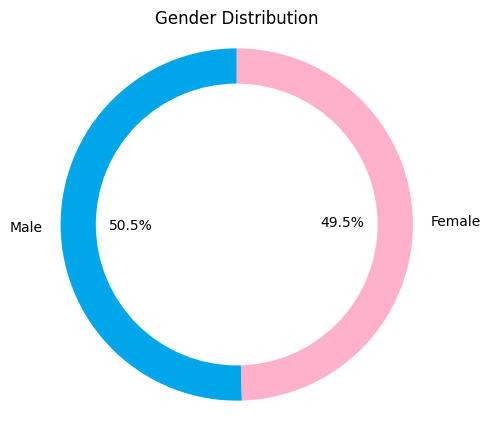

In [35]:
colors = ['#01A6EA','#FFB1CB']

# Membuat Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Gender Distribution')

plt.show()

Proporsi customer telco antara gender pria dan wanita cukup seimbang hampir 50:50.

2. ***Senior Citizens***

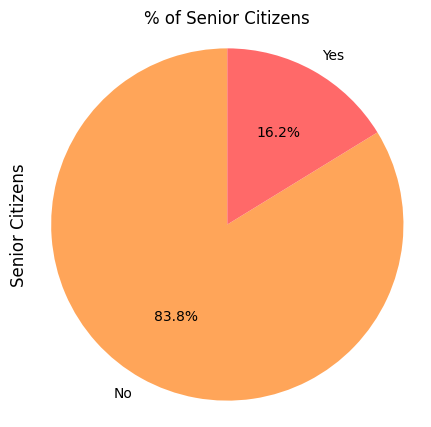

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(df['SeniorCitizen'].value_counts(), labels=['No', 'Yes'], autopct='%.1f%%', colors=['#FFA559', '#FF6969'], startangle=90)

ax.axis('equal')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('% of Senior Citizens', fontsize=12)

plt.show()

Hanya ada 16% dari pelanggan yang merupakan warga senior. Oleh karena itu, sebagian besar pelanggan dalam data kami adalah warga yang berusia muda/ dalam usia produktif.


2. ***Dependent dan Partner***

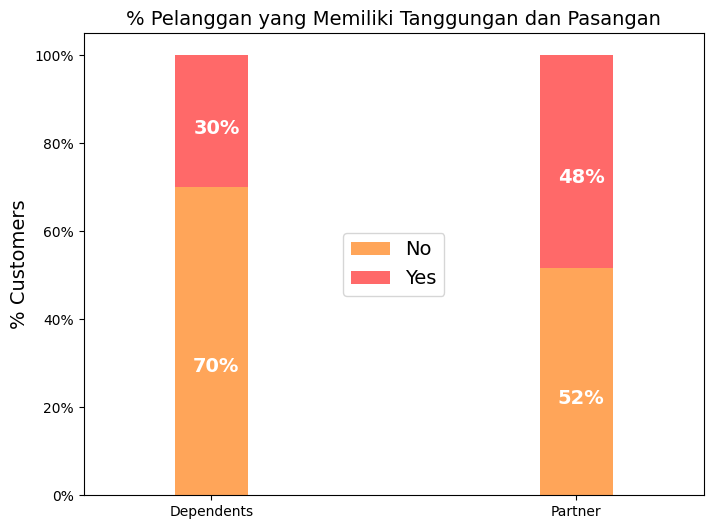

In [37]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#FFA559', '#FF6969']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Pelanggan yang Memiliki Tanggungan dan Pasangan',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Apa yang menarik untuk diamati adalah melihat persentase pelanggan yang memiliki pasangan dan juga memiliki tanggungan. Dikarenakan pelanggan yang memiliki pasangan ada kemungkinan tidak memiliki tanggungan. Ini akan kita eksplorasi lebih lanjut.

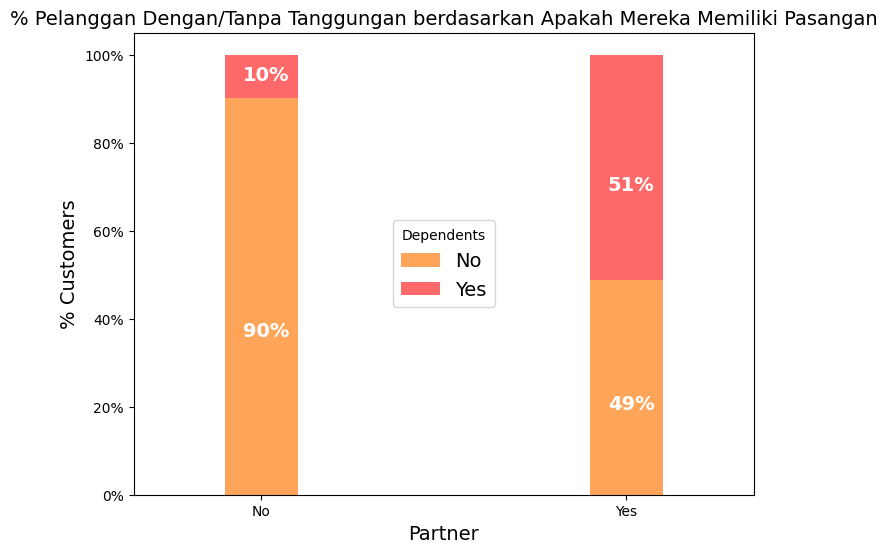

In [38]:
colors = ['#FFA559', '#FF6969']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Pelanggan Dengan/Tanpa Tanggungan berdasarkan Apakah Mereka Memiliki Pasangan',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Secara menarik, di antara pelanggan yang memiliki pasangan, hanya sekitar setengah dari mereka yang juga memiliki tanggungan, sedangkan setengah lainnya tidak memiliki tanggungan. Bisa didefinisikan pasangan disini bisa sebagai pacar, sehingga mereka tidak sebagai tanggungan. Selain itu, seperti yang diharapkan, di antara pelanggan yang tidak memiliki pasangan, mayoritas (90%) dari mereka tidak memiliki tanggungan.


#### E.1.2 ***Informasi Akun Pelanggan***: Mari kita sekarang lihat masa berlangganan (tenure), kontrak, monthly charges dan total charges


1. Tenure Terhadap Jenis Kontrak

Kita akan memahami masa langganan (tenure) pelanggan berdasarkan jenis kontrak mereka.

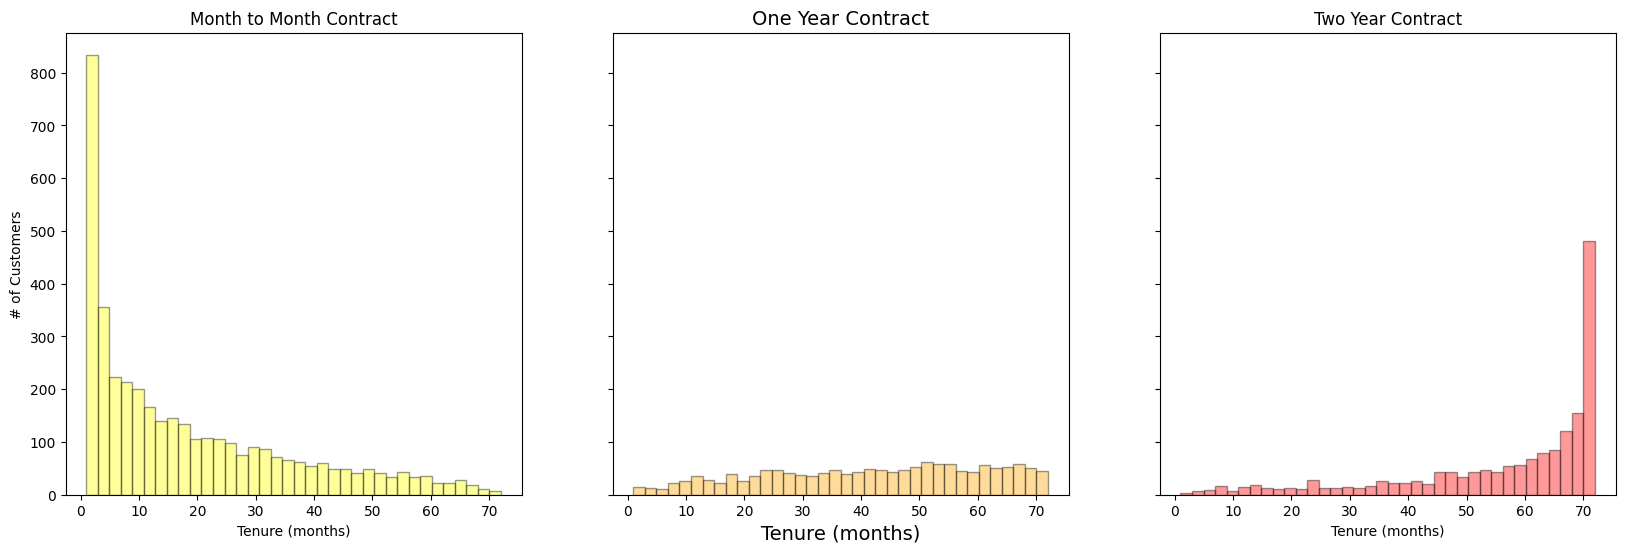

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'yellow',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'orange',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'red',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')
plt.show()

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Secara menarik, sebagian besar kontrak bulanan berlangsung selama 1-2 bulan masa berlangganannya, sementara kontrak 2 tahun cenderung berlangsung sekitar 70 bulan. Ini menunjukkan bahwa pelanggan yang mengambil kontrak lebih lama cenderung lebih setia terhadap perusahaan dan cenderung berlangganannya untuk jangka waktu yang lebih lama.

Ini nantinya akan kita analisis lebih lanjut terhadap churn apakah benar kecenderungan tersebut.

2. Monthly Charges, Tenure dan Total Charges

Kita akan mengetahui apakah biaya yang dibayarkan perbulan dan berdasarkan lamanya berlangganan customer (tenure) apakah cenderung sama sehingga jumlahnya sama dengan Total Biaya (MonthlyCharges * tenure = TotalCharges). Kesamaan ini menandakan bahwa suatu customer menggunakan satu atau beberapa layanan yang serupa selama masa berlangganan.

In [41]:
dif0 = len(df[(df['MonthlyCharges'] * df['tenure']==df['TotalCharges']) ])/len(df)*100
print(f'Jumlah customer yang konsisten selama masa berlangganan adalah {round(dif0,2)} % dari keselurahan customer')

Jumlah customer yang konsisten selama masa berlangganan adalah 8.73 % dari keselurahan customer


Hanya 8,73 % yang mempunyai kesamaan yang tepat dari keselurahan Customer. Namun, bisa saja terdapat biaya administrasi atau pemberian diskon pada setiap pembayaran. Selanjutnya, akan kita coba cek persebaran perbedaannnya.

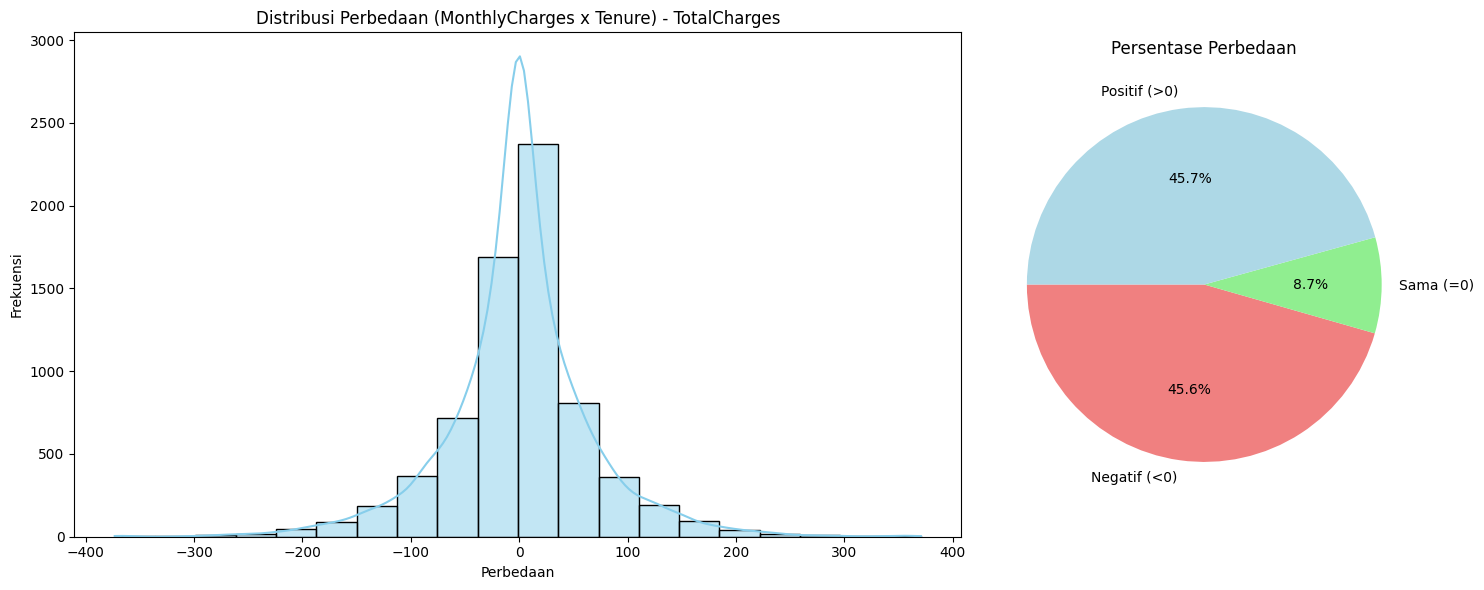

In [42]:
from matplotlib import gridspec

df['Difference'] = (df['tenure'] * df['MonthlyCharges']) - df['TotalCharges']

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 2])

# Plot distribusi histogram
ax0 = plt.subplot(gs[0])
sns.histplot(df['Difference'], bins=20, kde=True, color='skyblue', ax=ax0)
ax0.set_title('Distribusi Perbedaan (MonthlyCharges x Tenure) - TotalCharges')
ax0.set_xlabel('Perbedaan')
ax0.set_ylabel('Frekuensi')

# Menghitung banyaknya nilai yang kurang dari 0, sama dengan 0, dan lebih dari 0
negative_diff = (df['Difference'] < 0).sum()
zero_diff = (df['Difference'] == 0).sum()
positive_diff = (df['Difference'] > 0).sum()

# Membuat data untuk pie chart
labels = ['Negatif (<0)', 'Sama (=0)', 'Positif (>0)']
sizes = [negative_diff, zero_diff, positive_diff]

# Plot pie chart
ax1 = plt.subplot(gs[1])
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=['lightcoral', 'lightgreen', 'lightblue'])
ax1.set_title('Persentase Perbedaan')

plt.tight_layout()
plt.show()

- Sekitar 8.7% Customer konsisten langganan terhadap **suatu layanan yang sama** selama masa langganannya (tenure)
- 45.6% Customer membayar lebih besar perbulannya dari total biaya yang seharusnya selama masa langganannya. Pembayaran yang lebih besar bisa terjadi karena adanya biaya **administrasi tambahan atau penambahan layanan berlangganan**. Hal ini, cukup menarik dan dapat dianalisis lebih lanjut.
- Sisanya sebanyak 45.7% membayar lebih kecil perbulannya dari total biaya yang seharusnya selama masa langganannya. Pembayaran yang lebih kecil bisa dikarenakan adanya **diskon atau pengurangan layananan berlangganan**. Hal ini, cukup menarik dan dapat dianalisis lebih lanjut.

#### E.1.3 ** Mari kita sekarang lihat distribusi berbagai **layanan** yang digunakan oleh pelanggan.

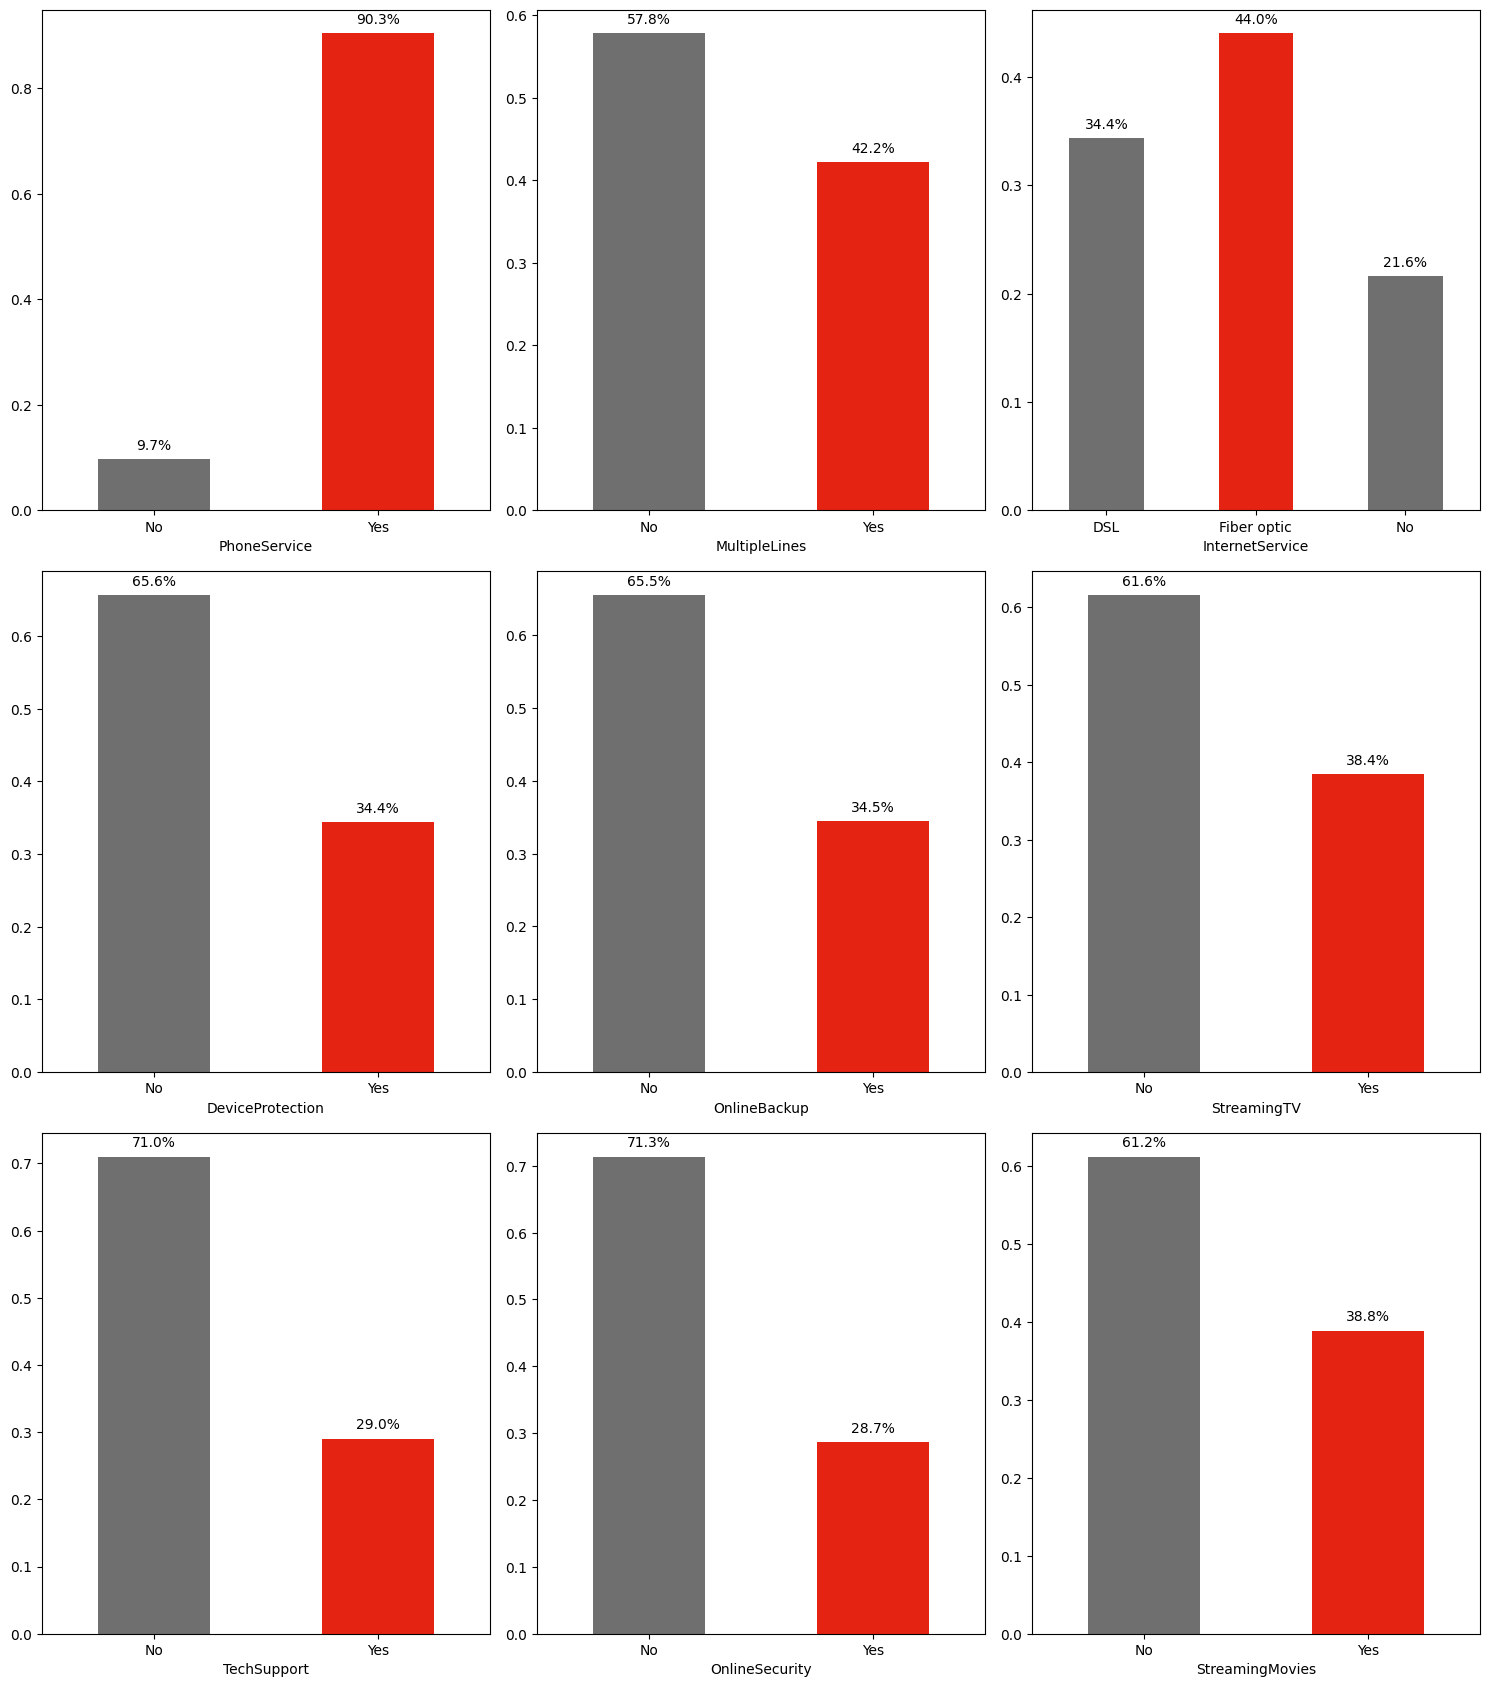

In [43]:
services = ['PhoneService','DeviceProtection','TechSupport','MultipleLines',
           'OnlineBackup','OnlineSecurity','InternetService','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 17))

for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[i, 0], rot=0, color=['#706F6F','#E42313'])
        for p in ax.patches:
            ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    elif 3 <= i < 6:
        ax = df[item].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[i-3, 1], rot=0, color=['#706F6F','#E42313'])
        for p in ax.patches:
            ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    elif i < 9:
        ax = df[item].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[i-6, 2], rot=0, color=['#706F6F','#E42313'])
        for p in ax.patches:
            ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Customer kami sebanyak 90.3 % berlangganan `PhoneService`, dan dari 90.3 %. Customer yang berlangganan `InternetServices` sebanyak 78.4% dengan 44% diantaranya memilih jenis `InternetServices` Fiber Optic, sisanya 34.4% memilih `DSL`. Customer yang berlangganan `InternetServices` cenderung membeli layanan lain yang membutuhkan internet services sebanyak 28-35% dari total customer. Distribusi layanan - layanan diatas akan dianalisis lebih lanjut terhadap Churn.

### E.2 Analisis Churn terhadap Variabel lainnya
Selanjutnya, mari kita lihat dan analisis variabel prediktor kita (Churn) dan memahami interaksinya dengan variabel lainnya .

In [44]:
# Membuat dataframe baru yang sesuai dengan ketiga kategori yang akan di analisis
df_service = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Churn']]
df_accountinfo = df[['tenure', 'Contract', 'PaymentMethod', 'PaperlessBilling', 'MonthlyCharges','TotalCharges','Churn']]
df_demografis = df[['gender','SeniorCitizen', 'Partner','Dependents','Churn']]

#### E.2.1 Analisis Data Demografi

In [45]:
df_demografis.head()

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Female,No,Yes,No,No
1,Male,No,No,No,No
2,Male,No,No,No,Yes
3,Male,No,No,No,No
4,Female,No,No,No,Yes


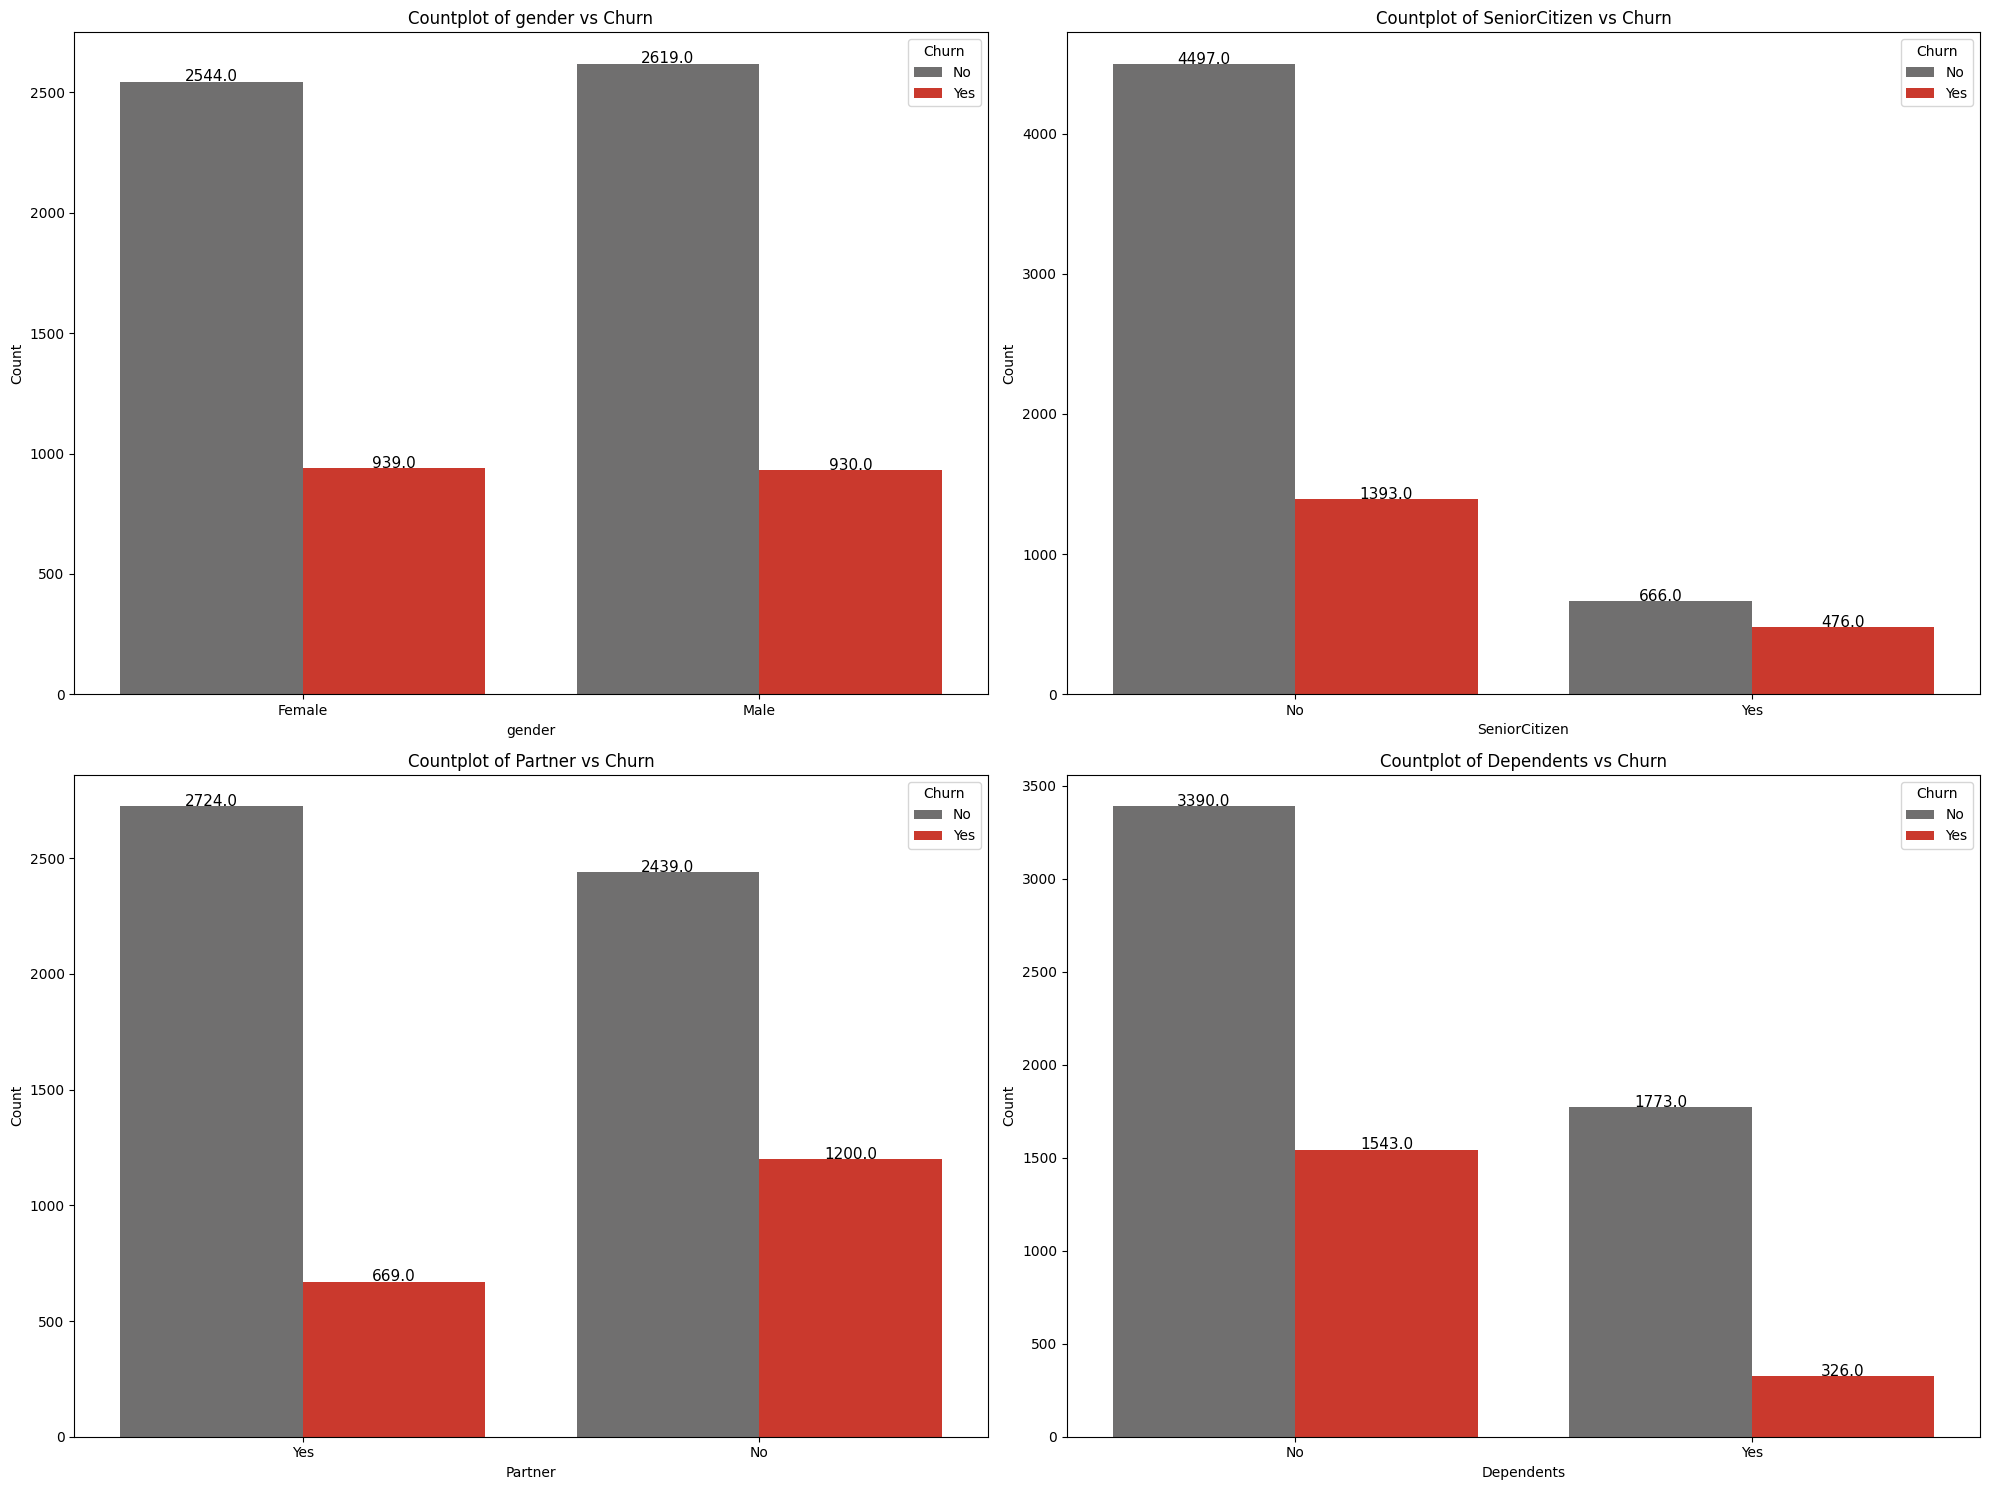

In [46]:
colors = ['#706F6F','#E42313']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

cols = list(df_demografis.columns)
cols.remove('Churn')


for i in range(2):
    for j in range(2):
        index = i * 2 + j
        if index < len(cols):
            column = cols[index]

            ax = axes[i, j]

            sns.countplot(x=column, data=df_demografis, ax=ax, hue='Churn', palette = colors)
            for x in ax.patches:
                ax.text(x.get_x() + x.get_width() / 2, x.get_height() + 2, x.get_height(), horizontalalignment='center', fontsize = 11)

            ax.set_title(f'Countplot of {column} vs Churn')
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
        else:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


1. Pada kolom `Gender` tidak adanya perbedaan yang signifikan pada pelanggan wanita dan pria. Tingkat churn mereka pun tergolong hampir sama
2. Pada kolom  `SeniorCitizen` perbandingan antara jumlah pelanggan yang berumur kurang dari 65 tahun dan lebih adalah 5 : 1. Jika dengan dibandingkan dengan tingkat churn pada masing masing kelompok pelanggan yang berumur lebih dari 65 tahun memiliki tingkat churn yang lebih tinggi.
3. Pada kolom `Partner` pelanggan yang memiliki pasangan kecenderungan untuk churn
4. Pada kolom `Dependents` pelanggan yang tidak memiliki orang yang bergantung kepada mereka cenderung untuk churn
5. Pada bagian demografis, jenis pelanggan yang memiliki potensi tingkat churn tertinggi adalah senior citizen
6. Sedangkan yang memiliki tingkat bertahan tertinggi adalah mereka yang memiliki dependents

Mencari jenis pelanggan yang memiliki churn tertinggi berdasarkan gabungan fiturnya

In [47]:
def finalDemografi(x):
    cols = list(df_demografis.columns)
    colsSkip = ['Gender', 'Churn']
    result = 0

    for col in cols:
        if col not in colsSkip:
            if x[col] == 'Yes':
                result+=1

    return result

df_demografis['FinalDemografi'] = df_demografis.apply(finalDemografi, axis=1)
df_demografis.head()

,gender,SeniorCitizen,Partner,Dependents,Churn,FinalDemografi
0,Female,No,Yes,No,No,1
1,Male,No,No,No,No,0
2,Male,No,No,No,Yes,0
3,Male,No,No,No,No,0
4,Female,No,No,No,Yes,0


In [48]:
df_demografisFemale = df_demografis[df_demografis['gender'] == 'Female']
df_demografisMale = df_demografis[df_demografis['gender'] == 'Male']

Berdasarkan gabungan antar fiturnya, pelanggan yang berumur dibawah 65 tahun dan tidak memiliki partner dan dependents lah yang memiliki jumlah churn terbanyak.

##### E.2.1.1 Analisis Tingkat Churn Bagian Demografi

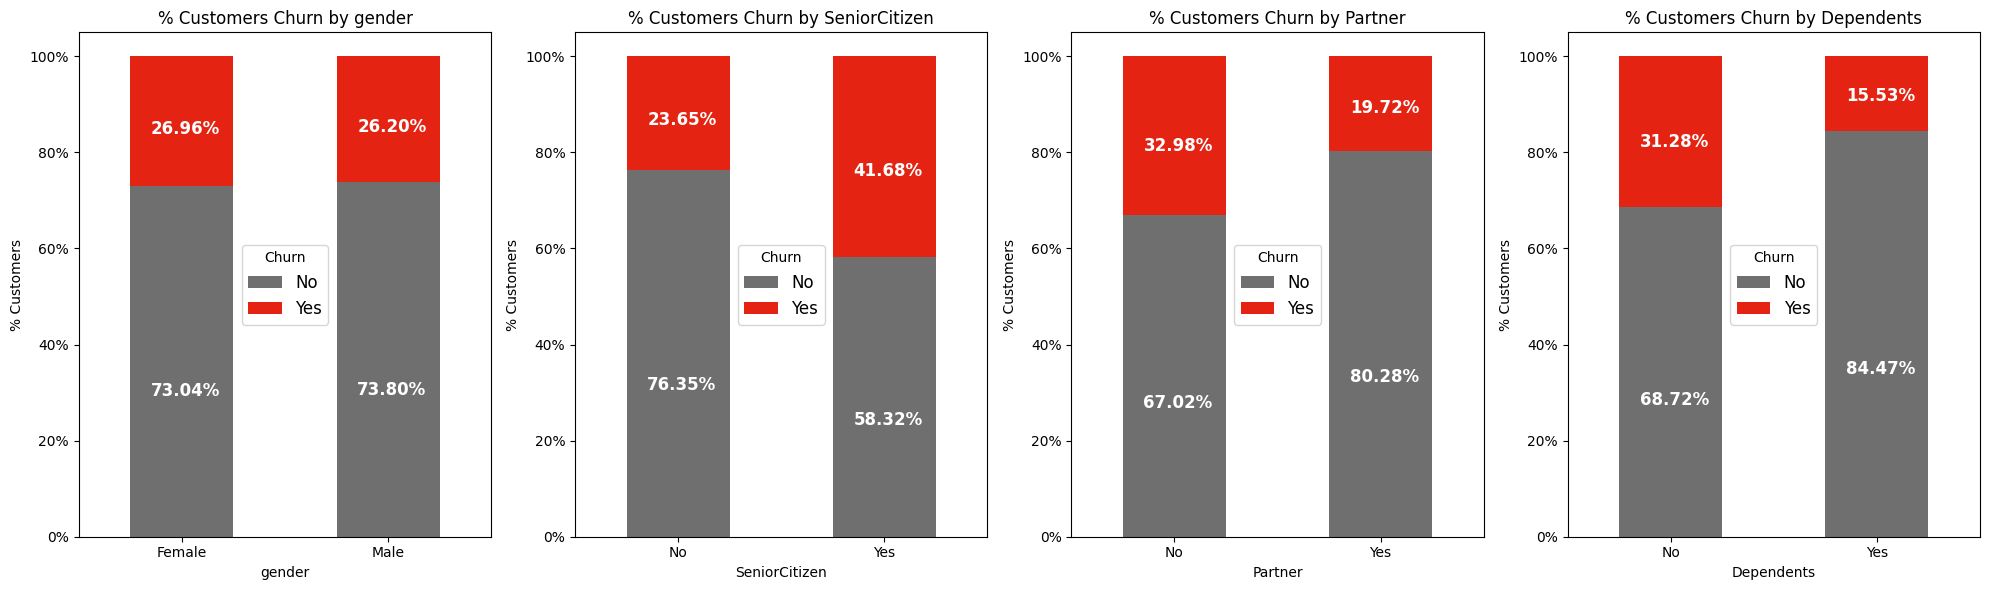

In [49]:
colors = ['#706F6F','#E42313']
columns_to_analyze = ['gender','SeniorCitizen', 'Partner', 'Dependents']

fig, axs = plt.subplots(1, len(columns_to_analyze), figsize=(20, 6))

for i, column in enumerate(columns_to_analyze):
    column_data = df_demografis.groupby([column, 'Churn']).size().unstack()
    percentages = (column_data.T * 100.0 / column_data.T.sum()).T

    ax = percentages.plot(kind='bar', stacked=True, color=colors, ax=axs[i])

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height != 0:
            ax.annotate(f'{height:.2f}%', (p.get_x() + .2 * width, p.get_y() + .4 * height),
                        color='white', weight='bold', size=12)

    ax.set_ylabel('% Customers')
    ax.set_title(f'% Customers Churn by {column}')
    ax.legend(title='Churn', loc='center', prop={'size': 12})

plt.tight_layout()
plt.show()

1. Jika kita lihat berdasarkan besarnya tingkat churn pada kolom gender, antar jenis kelamin tidak memiliki perbedaan yang signifikan
2. Berdasarkan `SeniorCitizen`, Pelanggan yang berumur dibawah 65 tahun memiliki jumlah pelanggan yang churn lebih tinggi. Akan tetapi, jika kita bandingkan antar nilainya mereka memiliki churn rate yang lebih kecil dibandingkan pelanggan yang memiliki umur diatas 65 tahun.
3. Berdasarkan punya atau tidaknya `Partner`, pelanggan yang tidak memiliki partner memiliki jumlah terbanyak dan juga tingkat churn yang tinggi.
4. Berdasarkan `Dependents`, pelanggan yang tidak memiliki dependents memiliki jumlah terbanyak dan juga tingkat churn yang tinggi.

#### E.2.2 Analisis Data Layanan Terhadap Churn

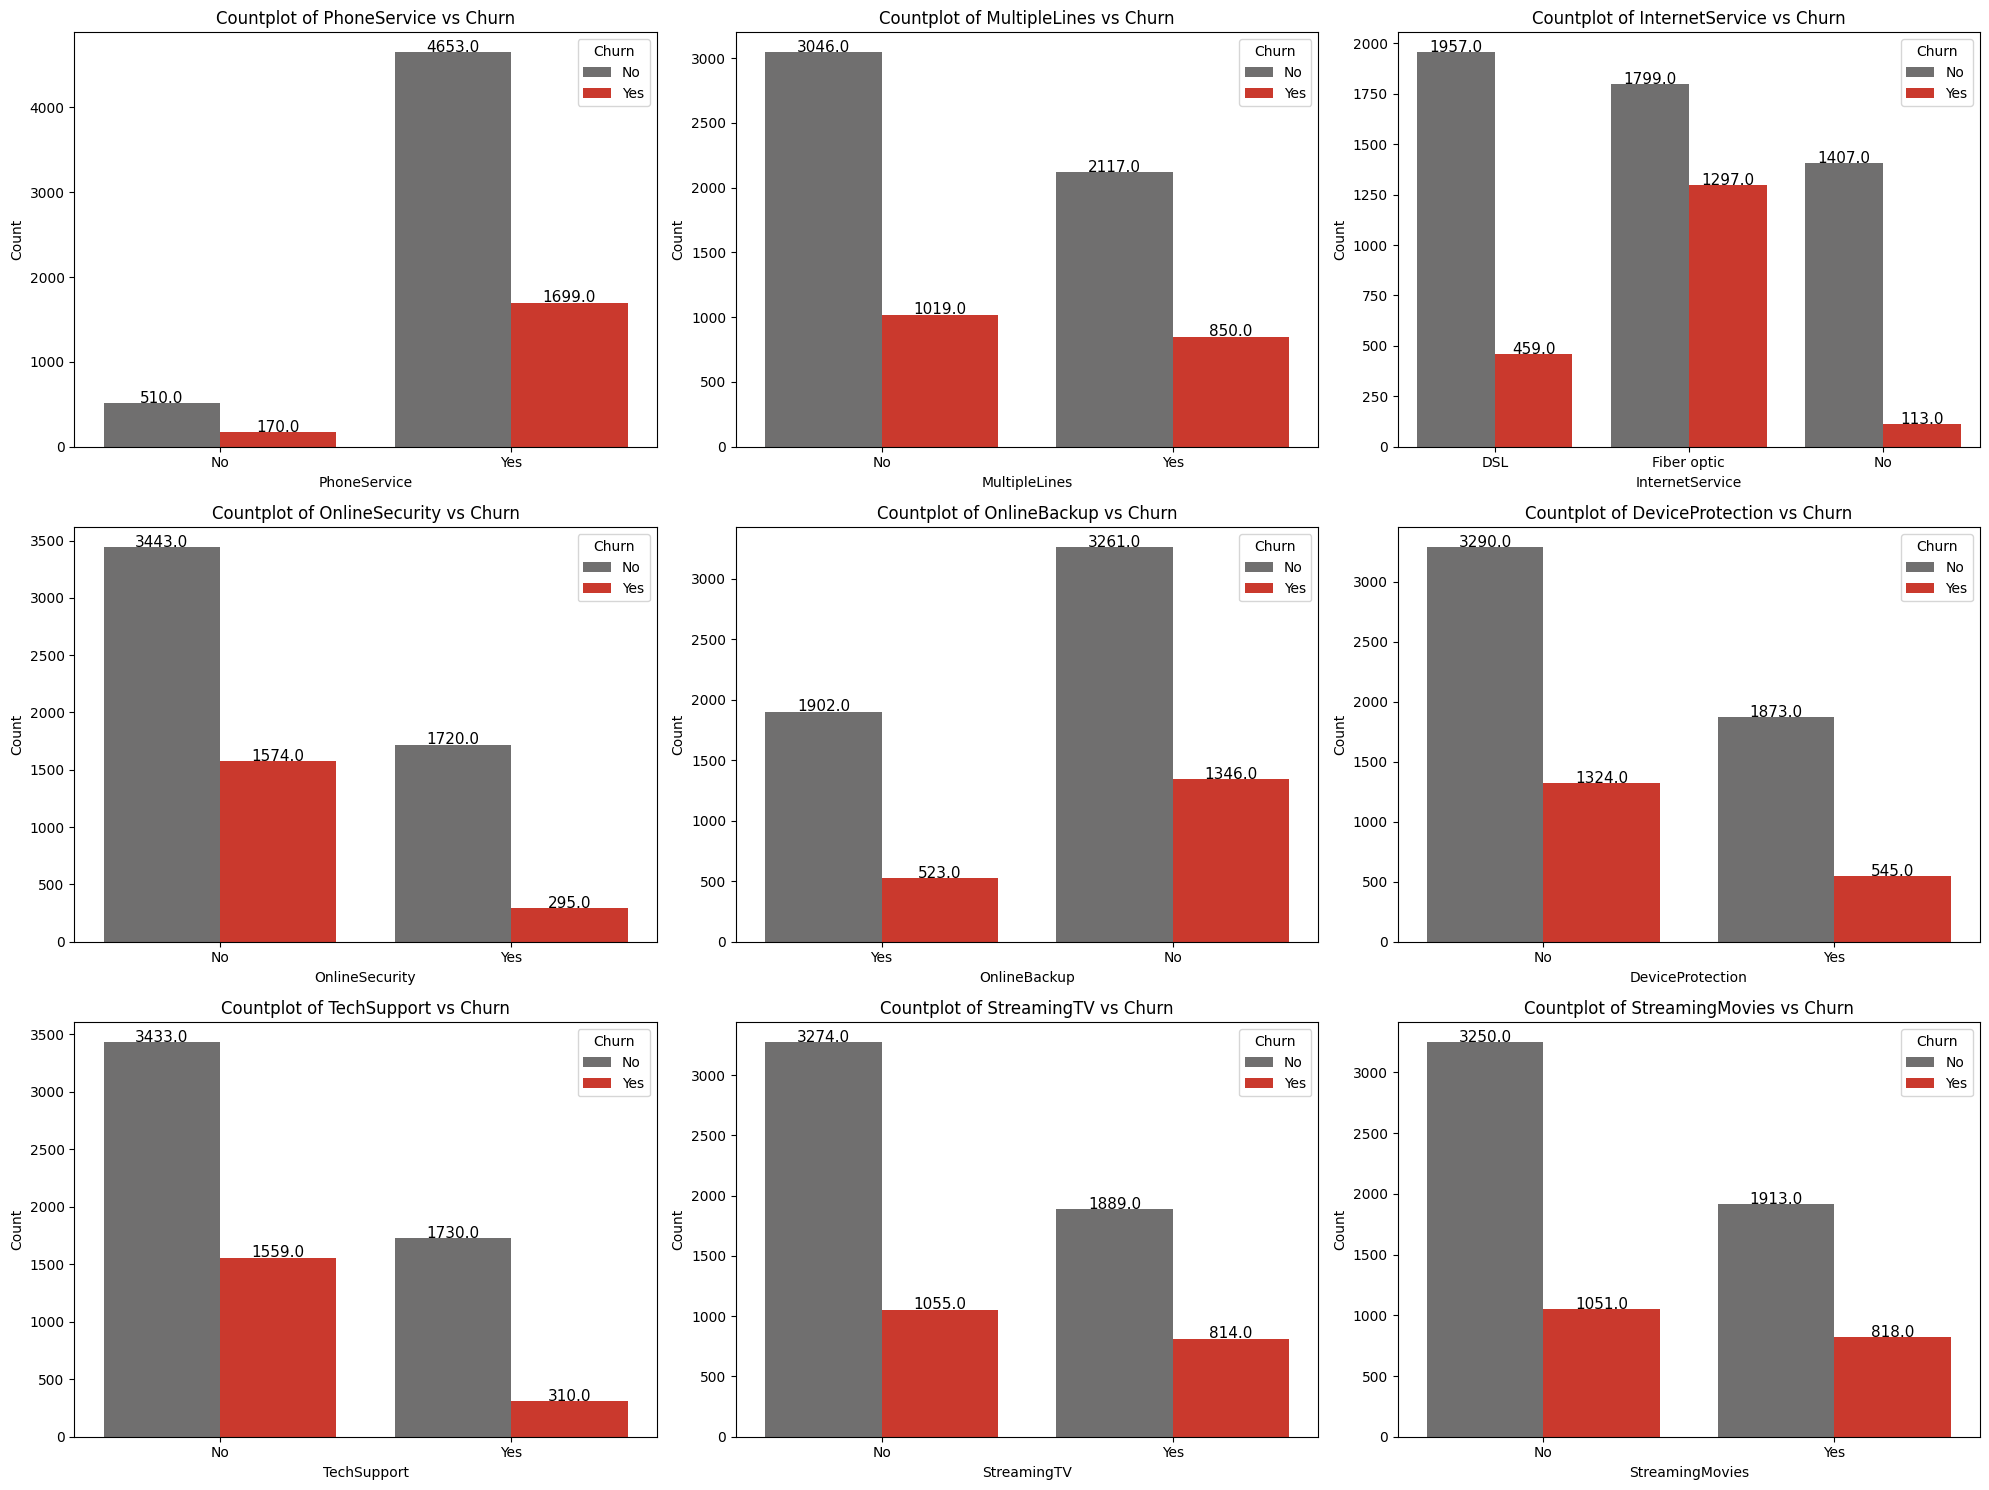

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

cols = list(df_service.columns)
cols.remove('Churn')

for i in range(3):
    for j in range(3):
        index = i * 3 + j
        if index < len(cols):
            column = cols[index]

            ax = axes[i, j]

            sns.countplot(x=column, data=df_service, ax=ax, hue='Churn', palette = colors)
            for x in ax.patches:
                ax.text(x.get_x() + x.get_width() / 2, x.get_height() + 2, x.get_height(), horizontalalignment='center', fontsize = 11)

            ax.set_title(f'Countplot of {column} vs Churn')
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
        else:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


Berdasarkan proporsi dari yang tidak churn dan churn adalah hampir 4 kali lipatnya, terbukti dari kategori service bahwa hampir semua pelanggan cenderung untuk tidak berhenti berlangganan. Mari kita lihat lebih detail terhadap karakteristik pelanggan yang berhenti berlangganan pada setiap kolomnya.

1. Pada kolom `PhoneService` bisa kita pelanggan yang tidak mempunyai layanan telepon cenderung untuk bertahan dengan perbandingan 1:3 dengan yang berhenti berlangganan.
2. Pada kolom `MultipleLines` pelanggan yang mempunyai layanan telepon dan mempunya beberapa saluran telepon memiliki kecenderungan yang lebih besar untuk berhenti berlangganan dibanding yang tidak mempunya saluran telepon atau tidak mempunya beberapa saluran telepon.
3. Pada kolom `InternetService` pelangganan yang menggunakan fiber optic sebagai pilihan internet mereka cenderung untuk berhenti berlangganan
4. Pada kolom `OnlineSecurity` pelanggan yang tidak memiliki online security cenderung untuk untuk berhenti berlangganan
5. Pada kolom `OnlineBackup` pelangggan yang tidak memiliki fasilitas online backup lebih condong untuk berhenti berlanggan
6. Pada kolom `DeviceProtection` pelanggan yang tidak menggunakan layanan tersebut cenderung untuk berhenti berlangganan
7. Pada kolom `TechSupport` pelanggan yang tidak menggunakan layanan tersebut cenderung untuk berhenti berlanggan
8. Pada kolom `StreamingTV` pelangganan yang tidak memiliki layanan tersebut cenderung untuk berhenti berlangganan
9. Pada kolom `StreamingMovies` pelanggan yang tidak memiliki layanan teresbut cenderung untuk berhenti berlangganan

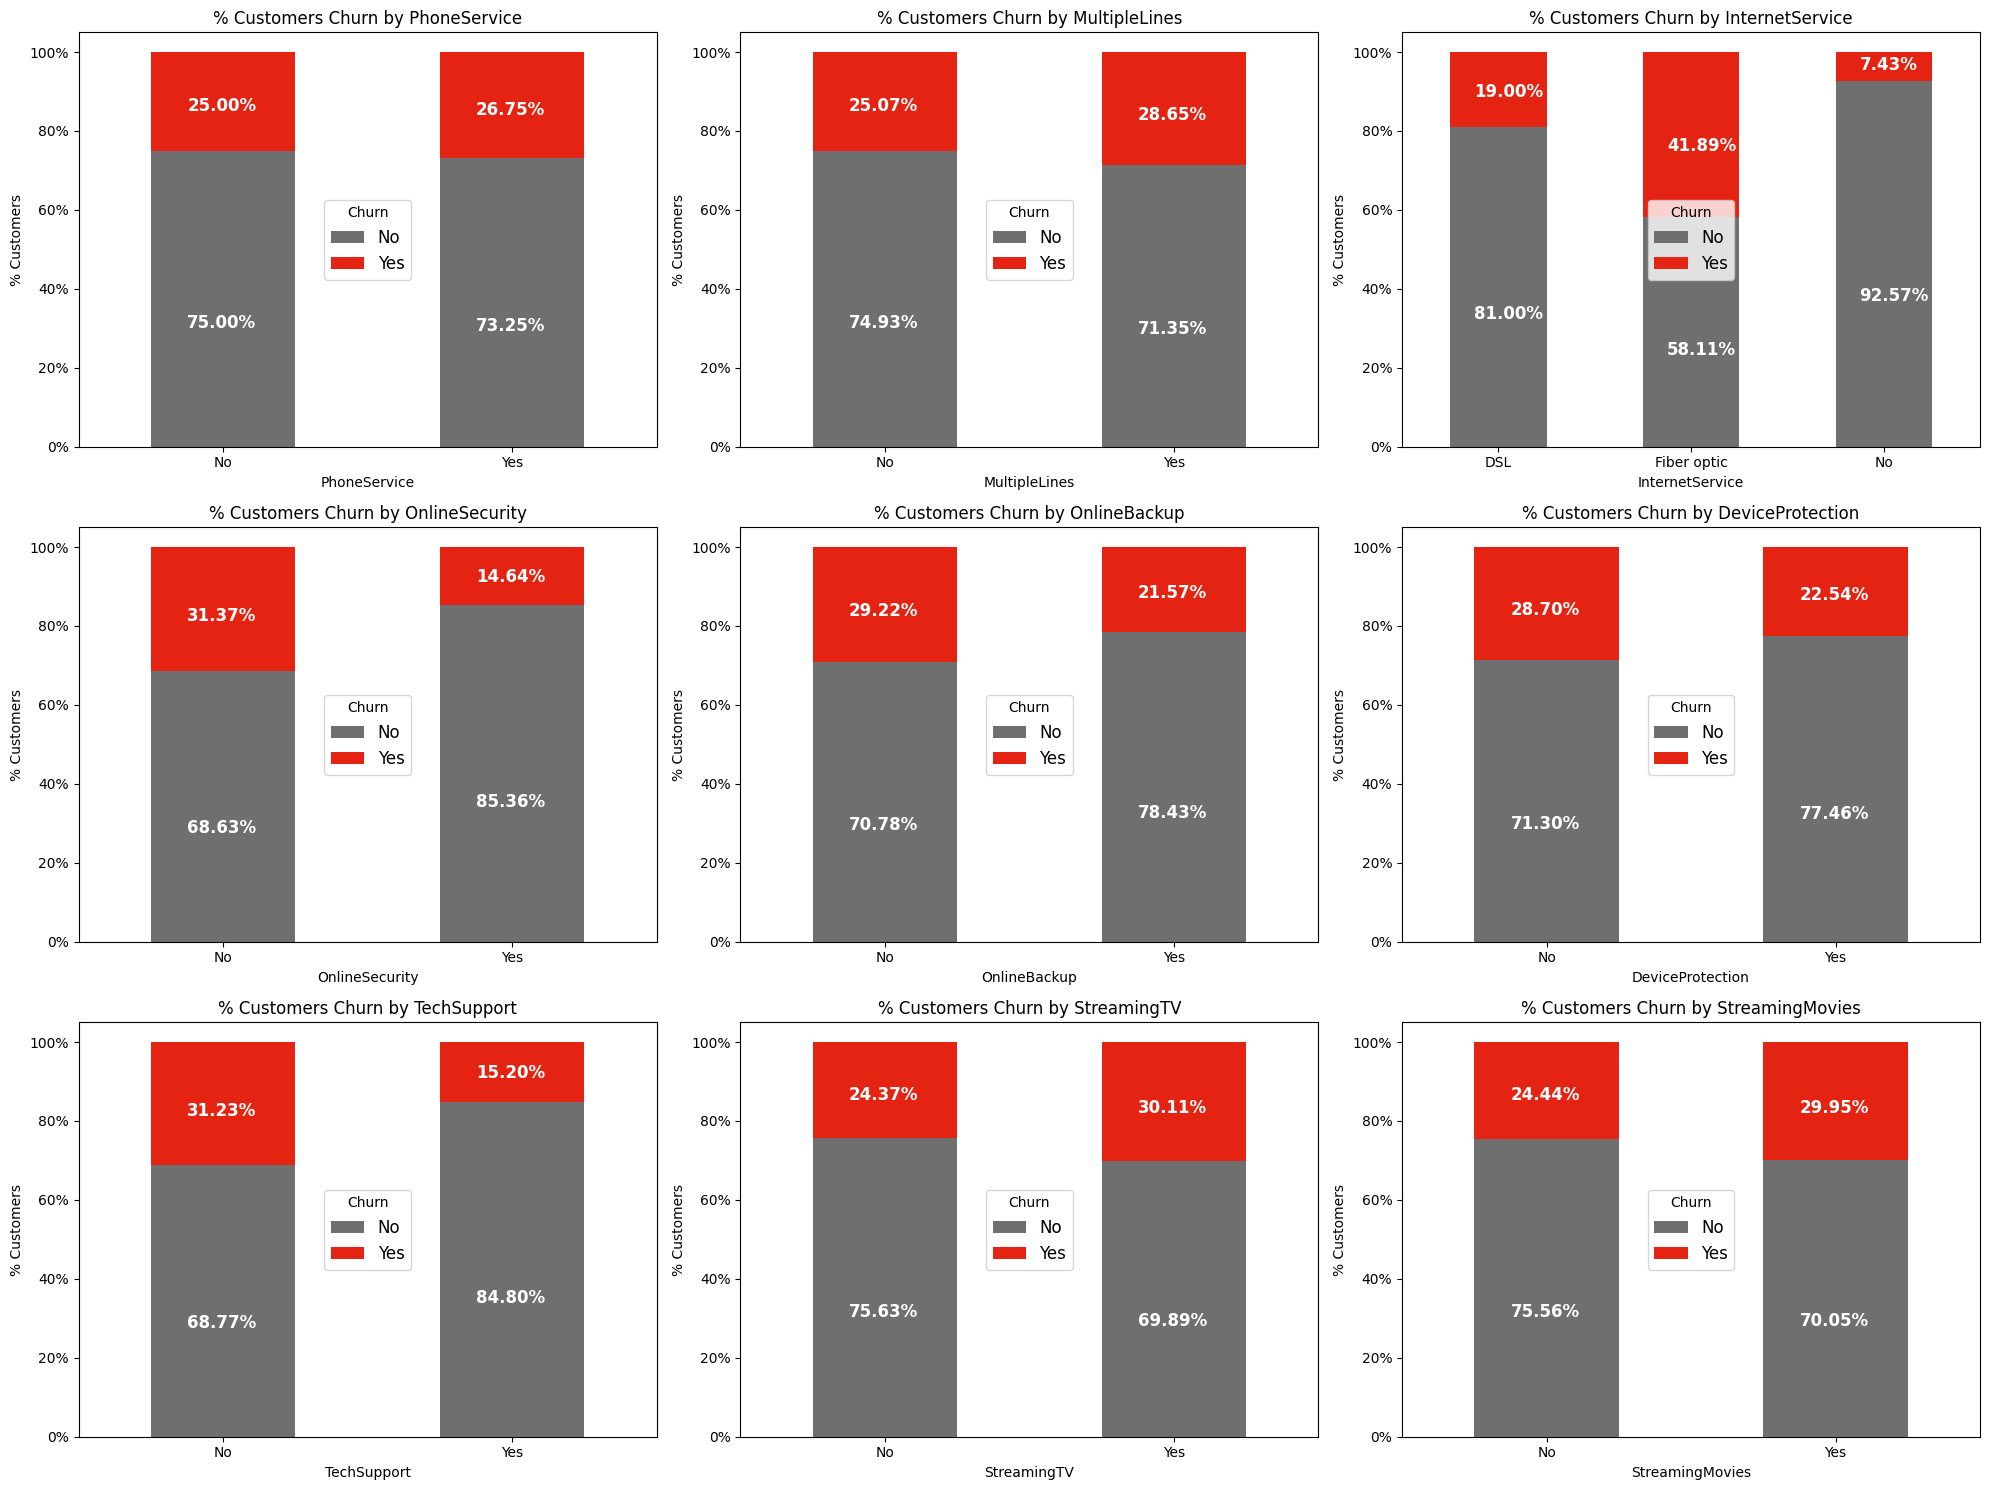

In [51]:
colors = ['#706F6F','#E42313']
columns_to_analyze = list(df_service.columns)
columns_to_analyze.remove('Churn')

fig, axs = plt.subplots(3, 3, figsize=(20, 15))

for i, column in enumerate(columns_to_analyze):
    column_data = df_service.groupby([column, 'Churn']).size().unstack()
    percentages = (column_data.T * 100.0 / column_data.T.sum()).T

    row_position = i // 3
    col_position = i % 3

    ax = percentages.plot(kind='bar', stacked=True, color=colors, ax=axs[row_position, col_position])

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height != 0:
            ax.annotate(f'{height:.2f}%', (p.get_x() + .25 * width, p.get_y() + .4 * height),
                        color='white', weight='bold', size=12)

    ax.set_ylabel('% Customers')
    ax.set_title(f'% Customers Churn by {column}')
    ax.legend(title='Churn',  loc='center', prop={'size': 12})

for i in range(len(columns_to_analyze), 3 * 3):
    axs.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


Pada bagian layanan kita akan berfokus terhadap jenis layanan yang dipunyai oleh pelanggan, agar kita dapat melihat layanan apa yang berpotensi membuat pelanggan untuk churn atau tidak.
1. Layanan `InternetService` fiber optic memiliki tingkat churn tertinggi dibandingkan layanan lainnya.
2. Layanan `OnlineSecurity` memiliki tingkat bertahan paling tinggi dibandingkan dengan yang lainnya.

##### E.2.2.1 Jumlah Layanan yang Dimiliki Pelanggan Terhadap Churn

In [52]:
# Karena DSL dan Fiber Optic berarti memiliki layanan internet, kita rubah nilai nya untuk memudahkan analisis
def internetService(x):
    if x != 'No':
        return 'Yes'
    else:
        return x

df_service['newInternetService'] = df_service['InternetService'].apply(internetService)

In [53]:
# Membuat kolom total service untuk melihat perbandingan jumlah service yang dimiliki pelanggan terhadap churn
def totalService(row):
    total = 0
    colsSkip = ['Churn', 'InternetService'] # Tidak memasukan churn karena kolom target, dan kolom Internet service karena akan menggunakan kolom yang sudah dirubah
    for col in row.index:
        if col not in colsSkip and row[col] == 'Yes': # Menghitung jumlah service yang dimiliki pelanggan
            total += 1
    return total

df_service['totalService'] = df_service.apply(totalService, axis=1)

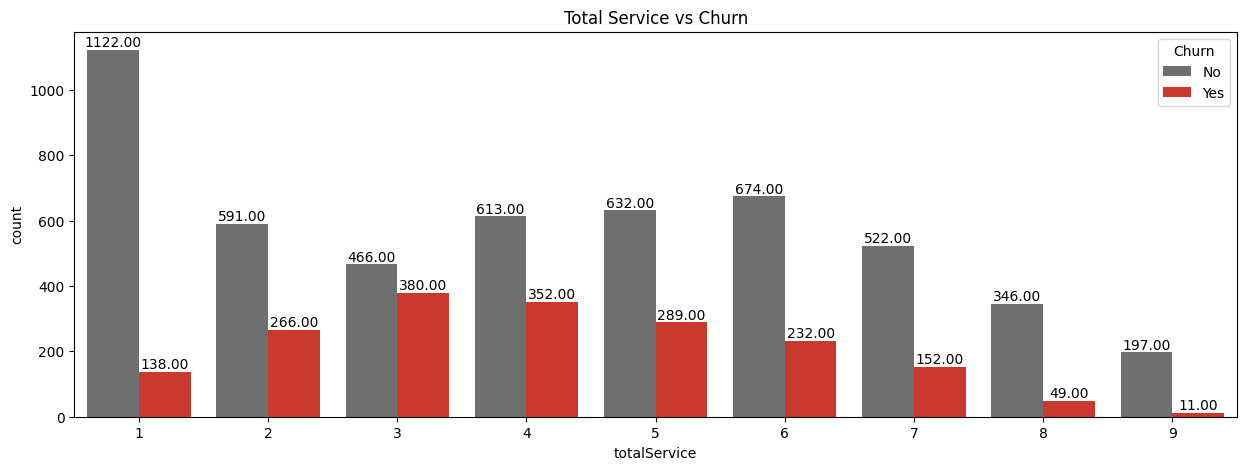

In [54]:
plt.figure(figsize = (15,5) )
plots = sns.countplot(data = df_service, x=df_service['totalService'], hue = 'Churn', palette = colors)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height() + 1), ha = 'center', va = 'center',
                   size = 10, xytext=(0,5),
                   textcoords = 'offset points')
plt.title('Total Service vs Churn')
plt.show()

1. Pengguna yang hanya memiliki 1 pilihan layanan memiliki tingkat bertahan yang paling tinggi antara hanya memiliki phone service atau internet service.
2. Pengguna yang memiliki 3 layanan memiliki tingkat churn yang paling tinggi
3. Bisa kita lihat pada grafik diatas jumlah churn semakin meningkat dari jumlah layanan yang dimiliki 1 hingga 3. Jumlah pelanggan yang churn semakin menurun dari pelanggan yang memiliki 4 layanan hingga 9.


In [55]:
# Mencari 3 paket layanan yang memiliki jumlah pelanggan churn tertinggi
dfThreeService = df_service[(df_service['totalService'] == 3) & (df_service['Churn'] == 'Yes')]
dfThreeService.value_counts().reset_index().sort_values('count',ascending=False).head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,newInternetService,totalService,count
0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes,Yes,3,103
1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Yes,Yes,3,51
2,Yes,No,Fiber optic,No,No,No,No,No,Yes,Yes,Yes,3,39
3,Yes,No,Fiber optic,No,Yes,No,No,No,No,Yes,Yes,3,26
4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Yes,Yes,3,20


Dari total 9 pilihan layanan yang disediakan perusahaan, pelanggan yang hanya mempunyai layanan telepon memiliki tingkat retain yang paling baik. Sedangkan, pelanggan yang mempunyai layanan telepon dengan beberapa saluran dan internet fiber optic menjadi jenis pelanggan yang memiliki tingkat churn tertinggi. Dari total 9 pilihan layanan yang disediakan perusahaan, pelanggan yang hanya mempunyai layanan telepon memiliki tingkat retain yang paling baik. Sedangkan, pelanggan yang mempunyai layanan telepon dengan beberapa saluran dan internet fiber optic menjadi jenis pelanggan yang memiliki tingkat churn tertinggi.

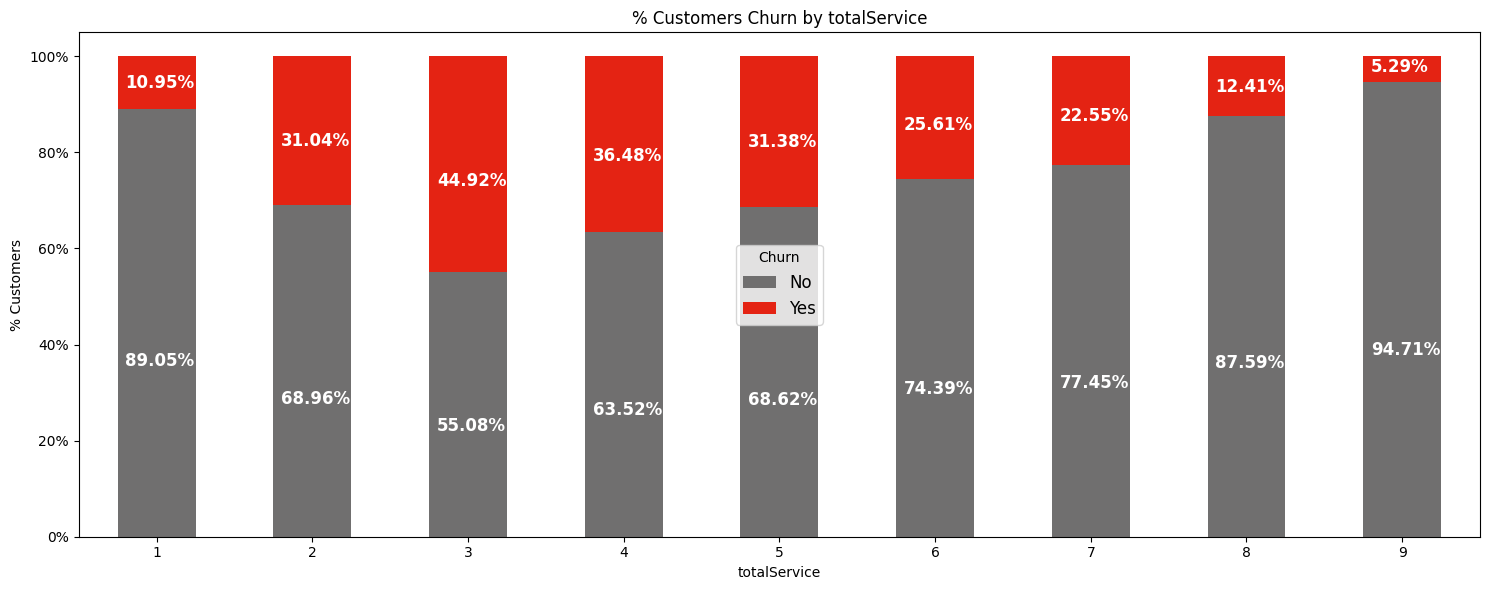

In [56]:
colors = ['#706F6F','#E42313']
column_data = df_service.groupby(['totalService', 'Churn']).size().unstack()
percentages = (column_data.T * 100.0 / column_data.T.sum()).T

fig, ax = plt.subplots(figsize=(15, 6))

ax = percentages.plot(kind='bar', stacked=True, color=colors, ax=ax)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(f'{height:.2f}%', (p.get_x() + .1 * width, p.get_y() + .4 * height),
                    color='white', weight='bold', size=12)

ax.set_ylabel('% Customers')
ax.set_title('% Customers Churn by totalService')
ax.legend(title='Churn', loc='center', prop={'size': 12})

plt.tight_layout()
plt.show()


Tingkat churn menunjukan pola yang sama, dimana tingkat churn akan meningkat dari 1 hingga 3 layanan dan akan menurun jika lebih dari itu.

#### E.2.3 Analisis Data Informasi Akun

In [57]:
df_accountinfo.head()

,tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,Month-to-month,Electronic check,Yes,29.85,29.85,No
1,34,One year,Mailed check,No,56.95,1889.50,No
2,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
3,45,One year,Bank transfer (automatic),No,42.30,1840.75,No
4,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes


In [58]:
# Pisah antara kolom numerical dan kategorical
df_accountinfoNum = df_accountinfo[['tenure', 'MonthlyCharges','TotalCharges','Churn']]
df_accountinfoCat = df_accountinfo[['Contract','PaymentMethod','PaperlessBilling','Churn']]

##### E.2.3.1 Kolom Kategori Pada Informasi Akun

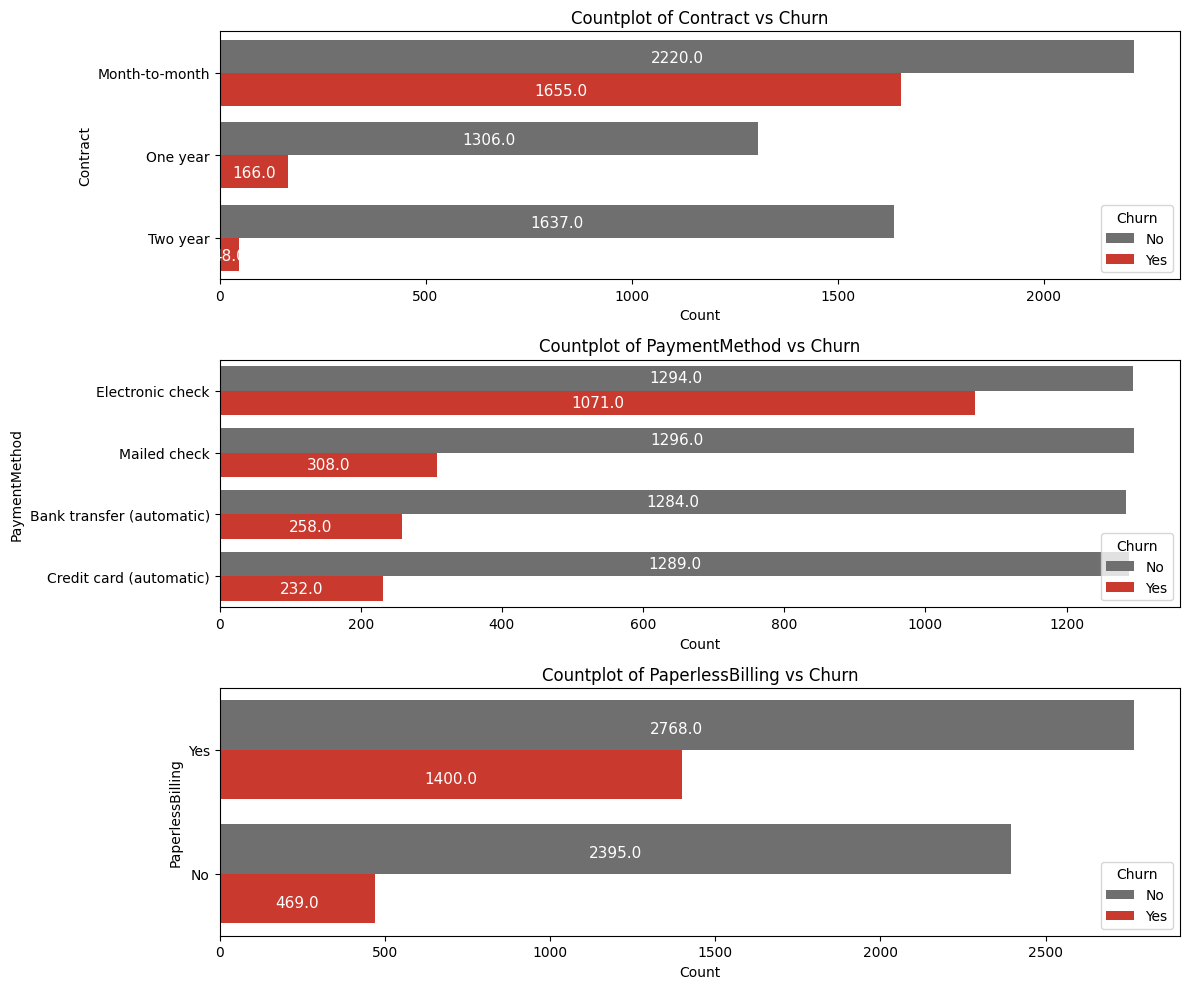

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

cols = list(df_accountinfoCat.columns)
cols.remove('Churn')


for j, column in enumerate(cols):
    ax = axes[j]


    sns.countplot(y=column, data=df_accountinfoCat, ax=ax, hue='Churn', palette = colors)
    for x in ax.patches:
        ax.text(x.get_width() / 2, x.get_y() + x.get_height() / 1.5, x.get_width(),
                horizontalalignment='center', fontsize=11, color='white')

    ax.set_title(f'Countplot of {column} vs Churn')
    ax.set_xlabel('Count')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()


1. Berdasarkan jenis kontraknya, pelanggan yang memiliki berlangganan bulanan memiliki tingkat churn tertinggi, ini dapat disebabkan oleh adanya kebabasan dari pelanggan untuk berganti penyedia layanan setiap bulannya karna ada ketidak puasan dari layanan yang diberikan
2. Berdasarkan metode pembayarannya yang membayar menggunakan electronic check mempunyai tingkat churn tertinggi. Metode pembayaran credit card menjadi metode yang paling sedikit tingkat churn. Ini dapat disebabkan adanya kemudahan pembayaran otomatis ketimbang konvensional.
3. Berdasarkan jenis billingnya, paperless billing memiliki jumlah pelanggan churn lebih besar ketimbang konvensional.

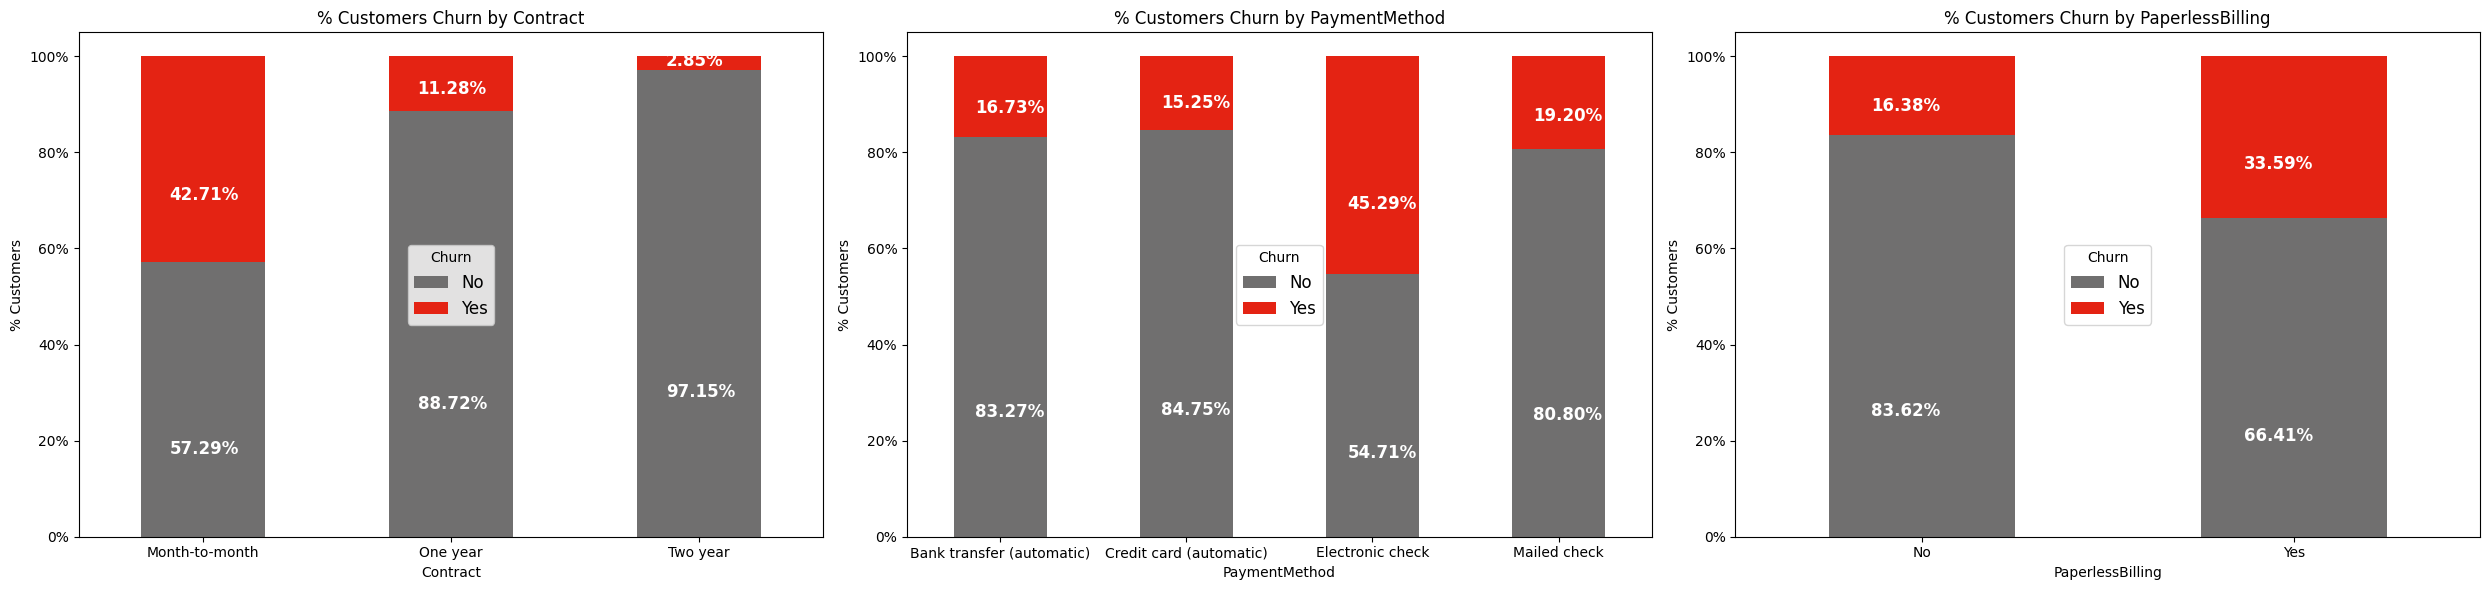

In [60]:
colors = ['#706F6F','#E42313']
columns_to_analyze = list(df_accountinfoCat.columns)
columns_to_analyze.remove('Churn')
fig, axs = plt.subplots(1, len(columns_to_analyze), figsize=(25, 6))

for i, column in enumerate(columns_to_analyze):
    column_data = df_accountinfoCat.groupby([column, 'Churn']).size().unstack()
    percentages = (column_data.T * 100.0 / column_data.T.sum()).T

    ax = percentages.plot(kind='bar', stacked=True, color=colors, ax=axs[i])

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height != 0:
            ax.annotate(f'{height:.2f}%', (p.get_x() + .23 * width, p.get_y() + .3 * height),
                        color='white', weight='bold', size=12)

    ax.set_ylabel('% Customers')
    ax.set_title(f'% Customers Churn by {column}')
    ax.legend(title='Churn', loc='center', prop={'size': 12})

plt.tight_layout()
plt.show()

1. Pada jenis kontrak nya pelanggan yang memilih paket berlangganan 2 tahun memiliki tingkat churn yang jauh lebih rendah dibandingkan dengan jenis berlangganan bulanan.
2. Pada metode pembayaran yang menggunakan metode electronic check memiliki tingkat churn yang lebih tinggi. Dan yang paling tinggi tingkat retained nya adalah metode pembayaran credit card.
3. Untuk jenis paperless biling, pelanggan yang memilih paperless billing memiliki tingkat churn yang tinggi.

##### E.2.3.2 Kolom Numerikal Pada Informasi Akun

In [61]:
df_accountinfoNum.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes


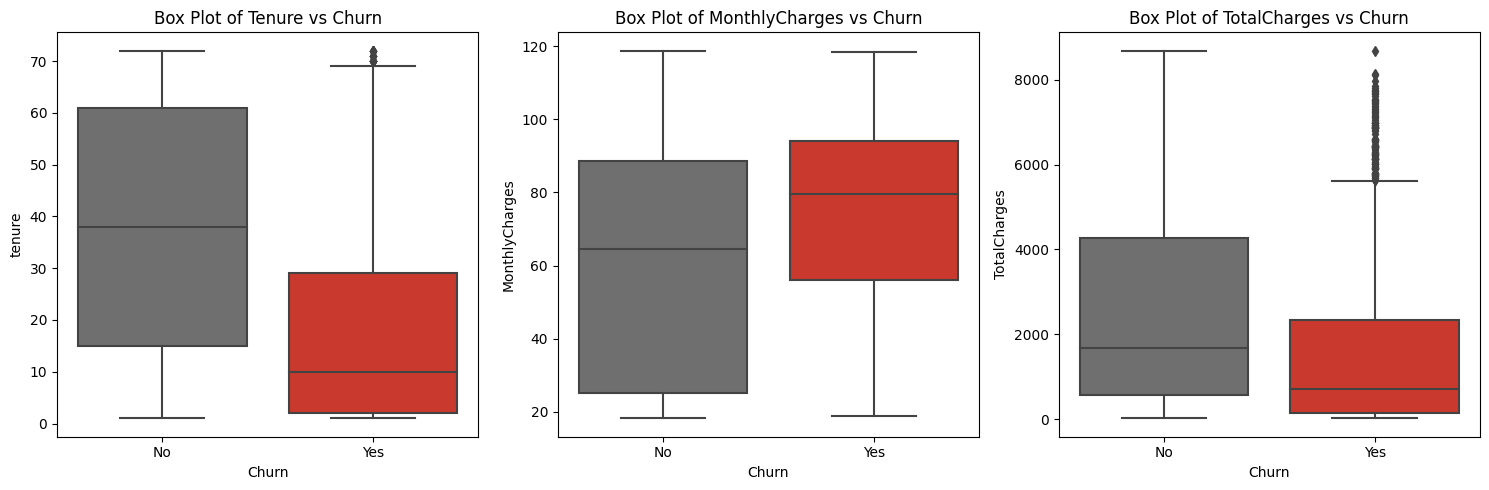

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Boxplot for 'tenure' vs 'Churn'
sns.boxplot(ax=axes[0], data=df_accountinfoNum, x='Churn', y='tenure', palette= colors)
axes[0].set_title('Box Plot of Tenure vs Churn')

# Boxplot for 'MonthlyCharges' vs 'Churn'
sns.boxplot(ax=axes[1], data=df_accountinfoNum, x='Churn', y='MonthlyCharges', palette= colors)
axes[1].set_title('Box Plot of MonthlyCharges vs Churn')

# Boxplot for 'TotalCharges' vs 'Churn'
sns.boxplot(ax=axes[2], data=df_accountinfoNum, x='Churn', y='TotalCharges', palette= colors)
axes[2].set_title('Box Plot of TotalCharges vs Churn')


plt.tight_layout()


plt.show()


1. Jika dilihat dari median pada tenure, adanya perbedaan yang signifikan antara yang churn dan tidak. Pelanggan yang telah lama berlangganan akan cenderung menunjukan tingkat loyalitas yang lebih tinggi terhadap perusahaan penyedia.
2. Untuk kolom MonthlyCharges, dilihat dari nilai medianya dapat disimpulkan bahwa pelanggan yang Churn membayar lebih tinggi dari mereka yang tidak churn
3. Untuk kolom totalcharges berdasarkan nilai mediannya mereka yang membayar lebih rendah cenderung untuk churn, ini dapat diakibatkan tidak adanya rasa kehilangan karna membayar rendah.

#### E.2.3. Analisis Data Jumlah Layanan Terhadap MonthlyCharges dan Churn

In [63]:
df_service_totalcharges = df_service = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','tenure' ,'MonthlyCharges','TotalCharges' ,'Churn']]
df_service_totalcharges.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges,Churn
0,No,No,DSL,No,Yes,No,No,No,No,1,29.85,29.85,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,34,56.95,1889.50,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,2,53.85,108.15,Yes
3,No,No,DSL,Yes,No,Yes,Yes,No,No,45,42.30,1840.75,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,2,70.70,151.65,Yes


In [64]:
df_service_totalcharges['InternetService'] = df_service['InternetService'].apply(internetService)
df_service_totalcharges.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges,Churn
0,No,No,Yes,No,Yes,No,No,No,No,1,29.85,29.85,No
1,Yes,No,Yes,Yes,No,Yes,No,No,No,34,56.95,1889.50,No
2,Yes,No,Yes,Yes,Yes,No,No,No,No,2,53.85,108.15,Yes
3,No,No,Yes,Yes,No,Yes,Yes,No,No,45,42.30,1840.75,No
4,Yes,No,Yes,No,No,No,No,No,No,2,70.70,151.65,Yes


In [65]:
# Membuat kolom total service untuk melihat perbandingan jumlah service yang dimiliki pelanggan terhadap churn
def totalService(row):
    total = 0
    colsSkip = ['Churn'] # Tidak memasukan churn karena kolom target
    for col in row.index:
        if col not in colsSkip and row[col] == 'Yes': # Menghitung jumlah service yang dimiliki pelanggan
            total += 1
    return total

df_service_totalcharges['totalService'] = df_service.apply(totalService, axis=1)
df_service_totalcharges.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges,Churn,totalService
0,No,No,Yes,No,Yes,No,No,No,No,1,29.85,29.85,No,2
1,Yes,No,Yes,Yes,No,Yes,No,No,No,34,56.95,1889.50,No,4
2,Yes,No,Yes,Yes,Yes,No,No,No,No,2,53.85,108.15,Yes,4
3,No,No,Yes,Yes,No,Yes,Yes,No,No,45,42.30,1840.75,No,4
4,Yes,No,Yes,No,No,No,No,No,No,2,70.70,151.65,Yes,2


In [66]:
df_service_charges = df_service_totalcharges[['totalService' ,'MonthlyCharges','Churn']]
df_service_charges.head()

,totalService,MonthlyCharges,Churn
0,2,29.85,No
1,4,56.95,No
2,4,53.85,Yes
3,4,42.30,No
4,2,70.70,Yes


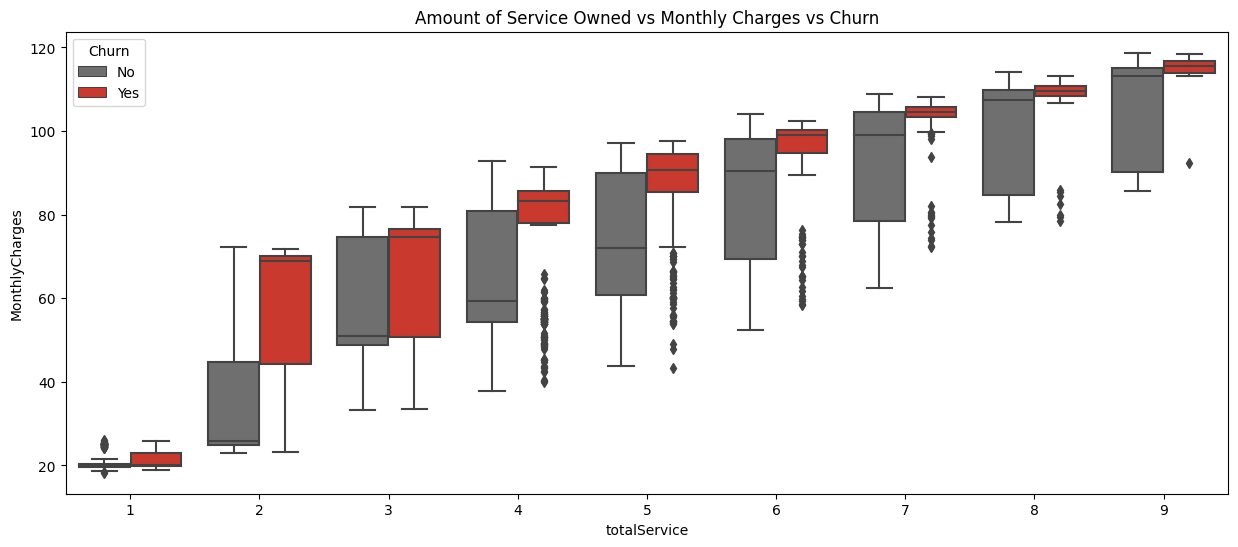

In [67]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data = df_service_charges, x = 'totalService' , y = 'MonthlyCharges', hue = 'Churn', palette= colors)
plt.title('Amount of Service Owned vs Monthly Charges vs Churn')
plt.show()

Sudah sepantasnya pelanggan yang memiliki jumlah layanan lebih banyak akan membayar lebih tinggi. Jika dilihat nilai median secara keseluruhan, mereka yang churn membayar lebih tinggi dibandingkan dengan mereka yang bertahan dan memiliki jumlah layanan yang sama. Untuk mereka yang berlanggan 2 hingga 3 produk adanya perbedaan nilai median yang cukup besar dibandingkan yang memiliki jumlah layanan diatas 3.

## **F. Machine Learning**

### F.1 Data Preprocessing Sebelum Modeling

#### F.1.1 Feature Selection

##### F.1.1.1 Categorical and Numerical Feature Correlation

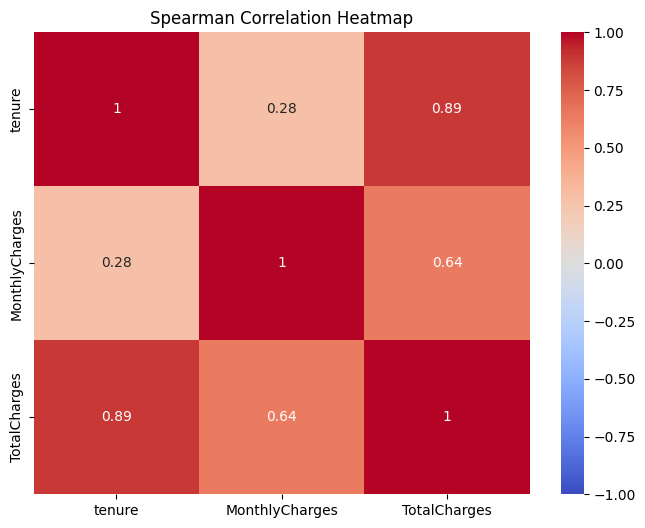

In [68]:
plot_cor_num(num_features)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Check VIF
vif_data = pd.DataFrame()
df_num = df[num_features]
vif_data["Variable"] = df_num.columns
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# Menampilkan hasil VIF
print(vif_data)

         Variable       VIF
0  tenure          6.332432
1  MonthlyCharges  3.361075
2  TotalCharges    8.079181


Else condition Met:  0.9997155203700907
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.010687122095445551
Else condition Met:  0.004631750075254909
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.9994772076104754
Else condition Met:  0.011505783815786404
Else condition Met:  0.2098049750167311
Else condition Met:  0.0
Else condition Met:  0.14211644672694437


Else condition Met:  0.2644013560210589
Else condition Met:  0.03624062172785174
Else condition Met:  0.06517969668452017
Else condition Met:  0.057896501056162716
Else condition Met:  0.05896212783061173
Else condition Met:  0.10437697048047435
Else condition Met:  0.11885841061783625
Else condition Met:  0.1421771426428549
Else condition Met:  0.1554195023691206
Else condition Met:  0.1944112879231118
Else condition Met:  0.14964076703557547
Else condition Met:  0.0
Else condition Met:  0.011505783815786404
Else condition Met:  0.9997151968864103
Else condition Met:  0.45183268563195333
Else condition Met:  0.01337055206427199
Else condition Met:  0.14178252834340746
Else condition Met:  0.0
Else condition Met:  0.1425434355510289
Else condition Met:  0.1410565494005971
Else condition Met:  0.15280301214063854
Else condition Met:  0.11930632780530337
Else condition Met:  0.12362495739097709
Else condition Met:  0.11721943562564617
Else condition Met:  0.29486854105364
Else condition 

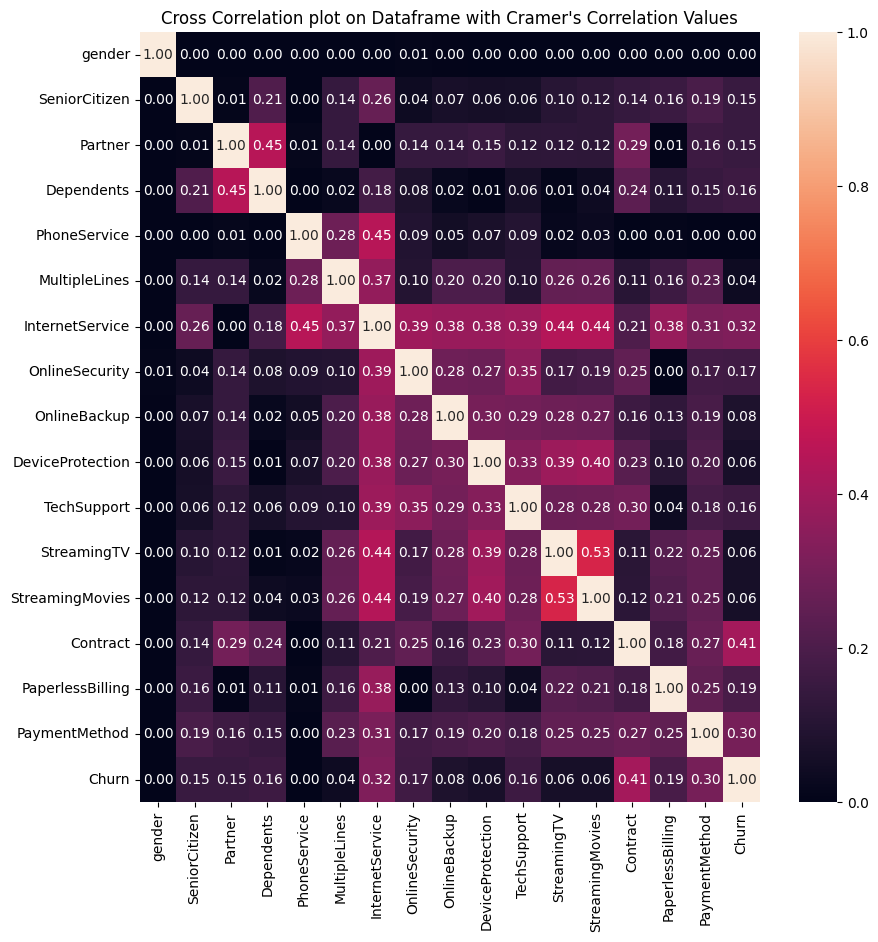

In [70]:
plot_cramer(df[cat_features_label])

- Fitur `TotalCharges` memiliki korelasi yang tinggi dengan fitur numerik lainnya. Begitupun nilai VIFnya cukup tinggi, VIF yang tinggi dapat menyebabkan terjadinya multikolinearitas. Moltikolinearitas dapat membuat model menjadi tidak maksimal
- Fitur `PhoneService`, `gender`, `StreamingTV`, `StreamingMovies`, `MultipleLines`, `OnlineBackup`, `DeviceProtection` memperlihatkan korelasi yang sangat kecil terhadap `Churn`.

In [71]:
# Pemetaan target fitur menjadi numerik

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [72]:
# Fitur fitur yang digunakan
df_ML=df[['tenure',
 'MonthlyCharges',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']]

In [73]:
df_ML.head()

,tenure,MonthlyCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,No,Yes,No,DSL,No,No,Month-to-month,Yes,Electronic check,0
1,34,56.95,No,No,No,DSL,Yes,No,One year,No,Mailed check,0
2,2,53.85,No,No,No,DSL,Yes,No,Month-to-month,Yes,Mailed check,1
3,45,42.30,No,No,No,DSL,Yes,Yes,One year,No,Bank transfer (automatic),0
4,2,70.70,No,No,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,1


##### F.1.1.2 Data Splitting

In [74]:
X = df_ML.drop(columns=['Churn'])
y = df_ML['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

### F.1.2 Feature Engineering (Encoding dan Scaling)
1. Proses processing yang dilakukan adalah encoding untuk feature kategorikal:
- One Hot Encoding : `Dependents`, `Partner`, `SeniorCitizen`,`Contract`, `OnlineSecurity`, `InternetService`, `TechSupport`, `PaperlessBilling`, dan `PaymentMethod`.


2. Scaling untuk feature numerikal:
- Min-Max Scaling untuk `tenure` dan `MonthlyCharges` dikarenakan sebarannya tidak normal dan tidak ada pencilan.

In [75]:
transformer = ColumnTransformer([
    ('min_max_scaler', MinMaxScaler(), ['tenure', 'MonthlyCharges']),
    ('onehot', OneHotEncoder(drop='first'), ['Dependents','Partner','SeniorCitizen','Contract','OnlineSecurity', 'InternetService', 'TechSupport', 'PaperlessBilling','PaymentMethod']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'Partner', 'SeniorCitizen',
                                  'Contract', 'OnlineSecurity',
                                  'InternetService', 'TechSupport',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [76]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'Partner', 'SeniorCitizen',
                                  'Contract', 'OnlineSecurity',
                                  'InternetService', 'TechSupport',
                                  'PaperlessBilling', 'PaymentMethod'])])

### F.2 Model Benchmarking

Model benchmarking akan dilakukan untuk membandingkan performa berbagai model machine learning dengan berbagai metode penanganan imbalance data ataupun tidak. Benchmarking dilakukan untuk mengidentifikasi model yang paling efektif dalam menangani imbalance data dan memberikan hasil yang baik dalam hal metrik evaluasi utama yaitu F2. Metrik seperti ROC AUC, precision, recall, F1 score, dan F2 score diperlihatkan sebagai pertimbangan. Setiap model dievaluasi menggunakan cross-validation dengan skema Stratified K-Fold dengan 5 lipatan dan diambil rata-rata hasil metrik evaluasinya.

#### F.2.1 Resampling
Diketahui bahwa proporsi targetnya (`Churn`) sangat tidak seimbang, maka dalam modeling ini akan dilakukan resampling dengan metode imbalance oversampling dan undersampling untuk mengetahui treatment apa yang paling cocok. Proses resampling akan dimasukan kedalam model benchmarking.

- Oversampling (penambahan jumlah sampel dari kelas minoritas berdasarkan target `Churn` dalam dataset)
    - RandomOverSampler
    - SMOTE
    
- Undersampling (pengurangan jumlah sampel dari kelas mayoritas berdasarkan target `Churn` dalam dataset)
    - RandomUnderSampler
    - NearMiss

- Penggabungan Oversampling dan Undersampling
    - SMOOTENN

Sumber : https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis


In [77]:
# Mendefinisikan model
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42,)
gboost = GradientBoostingClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42, verbose=False)

# Metode penanganan ketidakseimbangan kelas
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()
smoteen = SMOTEENN(random_state=42)

# Dictionary berisi metrik yang digunakan
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'f2': f2_score,
           'roc_auc': 'roc_auc'
          }

# A dictionary containing models used
models = {'KNN': knn,
          'Logistic Regression':logreg,
          'Decision Tree': tree,
          'XGBoost Classifier' : xgb,
          'CatBoost Classifier' : cat,
          'Rand Forrest Classifier' : rf,
          'GradBoost Classifier' : gboost
          }

# A dictionary containing resampling method used
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
    'smoteenn': smoteen
}

# List untuk menyimpan hasil
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
test_f2_arr = []
test_roc_auc_arr = []
list_model = []
list_resample = []

# Iterasi untuk semua model, metode resampling, dan metode cross-validation
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample == None:
            estimator = Pipeline([
                ('transform', transformer),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('transform', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)
        test_f2_arr.append(scores['test_f2'].mean() * 100)
        test_roc_auc_arr.append(scores['test_roc_auc'].mean() * 100)

# Membuat dataframe untuk semua output benchmarking
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr,
    'F2': test_f2_arr,
    'roc_auc': test_roc_auc_arr
})

model_bench


,model,resample,accuracy,precision,recall,F1,F2,roc_auc
0,KNN,none,67.663959,56.679944,48.860702,52.458538,50.234674,77.236669
1,Logistic Regression,none,71.075695,64.523605,52.637011,57.956086,54.639174,84.155248
2,Decision Tree,none,64.822491,47.303974,49.711998,48.460855,49.199426,65.064400
3,XGBoost Classifier,none,69.116137,60.384061,50.215302,54.767478,51.929729,81.800787
4,CatBoost Classifier,none,71.065093,65.061630,52.357143,57.958954,54.450824,83.875609
5,Rand Forrest Classifier,none,68.531077,61.502287,47.934672,53.825183,50.120239,81.295105
6,GradBoost Classifier,none,71.166551,66.025407,52.069903,58.182442,54.347152,84.722628
7,KNN,ros,70.035610,45.926779,69.900610,55.423527,63.284121,75.733390
8,Logistic Regression,ros,76.262299,51.538942,79.668785,62.571652,71.811857,84.143646
9,Decision Tree,ros,66.013612,49.993936,50.286223,50.080389,50.190049,66.044752


In [78]:
model_bench.sort_values(by=['F2'],ascending=False).head()

,model,resample,accuracy,precision,recall,F1,F2,roc_auc
36,Logistic Regression,smoteenn,76.043027,50.130194,81.451195,62.046155,72.386546,83.830426
20,GradBoost Classifier,rus,76.237571,51.322210,79.954245,62.508408,71.921390,84.314648
8,Logistic Regression,ros,76.262299,51.538942,79.668785,62.571652,71.811857,84.143646
18,CatBoost Classifier,rus,76.168781,51.486864,79.455008,62.480924,71.665759,83.838561
22,Logistic Regression,smote,76.334840,52.156875,78.883833,62.782318,71.539002,84.097750


Hasil benchmarking ketika diurutkan terhadap metrik utama F2, terlihat tiga model dengan hasil benchmarking terbaik menggunakan model Logistic Regression. Logistic Regression dengan teknik resampling SMOOTEEN yang memiliki hasil lebih baik dibandingkan dengan teknik resampling lainnya. Nilai precision dan F1 yang cenderung kecil terjadi karena keadaan data target/ label (Churn) yang imbalance. Namun dapat dilihat dari balanced accuracy dan ROC AUC cukup baik diatas 75%, artinya model cukup baik dalam menangani keseimbangan kelas dan dapat membedakan antara kelas positif dan negatif dengan baik. Dengan demikian, model yang terpilih adalah Logistik Regresi dengan teknik resampling SMOTEEN.

#### F.2.2 Model Limitasi
- Model Limitasi:

Model terpilih hanya dapat digunakan pada data dengan nilai atau isi setiap variabel berikut / penggunaannya menjadi tidak valid jika nilai datanya diluar jangkauan ini:
- Model Limitasi:
    - tenure: 1 hingga 72
    - MonthlyCharges: 18.25 hingga 118.75
    - SeniorCitizen: 1 hingga 88
    - InternetService: Fiber optic/ DSL /No (atau tidak keduanya)
    - Contract: Month-to-month/ One year / Two year
    - PaymentMethod: Electronic check/ Mailed check/ Bank transfer (automatic)/ Credit card (automatic)
- Penggunaan Model:

Model ini digunakan sebulan sekali ketika melihat customer yang akan habis masa berlangganan terhadap suatu layanan sesuai dengan kontrak yang didaftarkan


#### F.2.3 Cara Kerja Model Logistic Regression

<img src="https://ashutoshtripathicom.files.wordpress.com/2019/06/image-59.png" alt="Gambar" width="700">


Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu pada kasus ini target `Churn`. Model ini bekerja dengan menghitung log-odds (logaritma dari perbandingan peluang) dari variabel target sebagai fungsi linier dari variabel prediktor, kemudian mengaplikasikan fungsi logistik (sigmoid) untuk mengubah log-odds menjadi probabilitas. Dengan menggunakan teknik optimasi, model logistic regression mencari koefisien regresi yang terbaik untuk memaksimalkan kemungkinan (likelihood) data pelatihan. Dengan demikian, model ini dapat digunakan untuk klasifikasi biner dalam memprediksi customer akan churn atau tidak

Berikut adalah parameter default pada logistic regression di library SKLearn:

LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)

Sumber:

https://vincentmichael089.medium.com/machine-learning-2-logistic-regression-96b3d4e7b603

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### F.3 Prediksi Menggunakan Data Tes

In [79]:
from sklearn.metrics import fbeta_score, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

logreg = LogisticRegression(random_state=42)
smoteenn = SMOTEENN(random_state=42)

score_accuracy = []
score_precision = []
score_recall = []
score_f1 = []
score_f2 = []
score_roc_auc = []

model = Pipeline([
    ('transform', transformer),
    ('resampling', resample),
    ('model', logreg)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score_accuracy.append(balanced_accuracy_score(y_test, y_pred) * 100)
score_precision.append(precision_score(y_test, y_pred) * 100)
score_recall.append(recall_score(y_test, y_pred) * 100)
score_f1.append(f1_score(y_test, y_pred) * 100)
score_f2.append(fbeta_score(y_test, y_pred, beta=2) * 100)
score_roc_auc.append(roc_auc_score(y_test, y_pred) * 100)

score_before_tuning = pd.DataFrame({
    'Accuracy': score_accuracy,
    'Precision': score_precision,
    'Recall': score_recall,
    'F1 Score': score_f1,
    'F2 Score': score_f2,
    'ROC AUC': score_roc_auc
}, index=['Logistic Regression Before Tuning'])

score_before_tuning

,Accuracy,Precision,Recall,F1 Score,F2 Score,ROC AUC
Logistic Regression Before Tuning,75.154628,48.65557,81.37045,60.897436,71.725179,75.154628


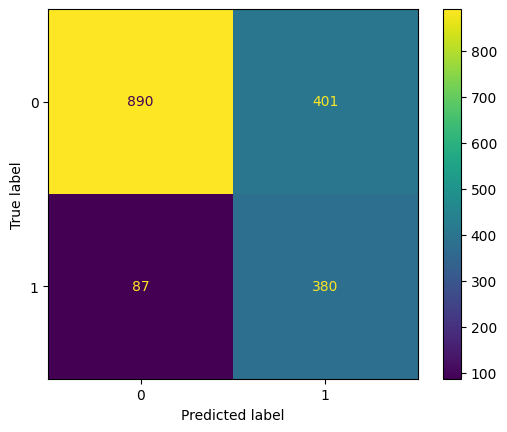

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
cm_before = confusion_matrix(y_test, y_pred, labels=model.classes_)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm_before, display_labels=model.classes_)

display_cm.plot()

Setelah menguji model untuk memprediksi data tes, Logistics Regression dengan resampling SMOTEENN mendapatkan nilai metrik F2 sebesar 71.72%. Nilai F2 tersebut menandakan keseimbangan yang baik antara kemampuan untuk mengidentifikasi positif (Churn) dan menghindari kesalahan prediksi negatif (memprediksi Not Churn sebagai Churn). Dengan F2 Score yang tinggi, model ini cenderung memiliki Recall yang baik yaitu 81.37%, yang berarti kemampuannya untuk mendeteksi pelanggan yang benar-benar Churn relatif tinggi. yang berdampak pada penurunan jumlah FN menjadi yang terendah, yaitu 87 customer yang diprediksi secara salah sebagai customer yang bertahan padahal sebenarnya Churn.

Sekarang, mari tingkatkan lebih lanjut persentase F2 dengan melakukan hyperparameter tuning pada Best Model yang telah dipilih.

### F.4 Hyperparameter Tuning

Hyperparameter tuning bertujuan untuk memilih kombinasi parameter terbaik pada model yang menghasilkan nilai metrics yang optimal. `GridSearchCV` adalah sebuah objek yang memungkinkan Anda untuk mencari kombinasi terbaik dari hyperparameter dengan melakukan validasi silang (cross-validation) pada setiap kombinasi.
Parameter pada model logreg yang akan kita tuning ada empat:
- penalty : Parameter ini mengontrol jenis penalti yang digunakan dalam fungsi kerugian (loss function) saat melatih model
- C : Parameter ini mengatur kekuatan penalti. Nilai yang lebih kecil menunjukkan penalti yang lebih kuat, sedangkan nilai yang lebih besar menunjukkan penalti yang lebih lemah
- solver : Parameter ini menentukan algoritma solver yang digunakan dalam optimisasi fungsi kerugian. Solver digunakan untuk menemukan bobot optimal yang menghasilkan prediksi yang baik
- max_iter : Parameter ini mengatur jumlah maksimum iterasi yang digunakan oleh solver untuk mencapai konvergensi.

Sumber:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://en.wikipedia.org/wiki/Hyperparameter_optimization

In [81]:
# Define Hyperparameter space for the 1st Tuning process
f2_score = make_scorer(fbeta_score, beta=2)

hyperparam_space = {
    'model__penalty': [None, 'l2', 'l1', 'elastic-net'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga', 'lbfgs'],
    'model__max_iter': [100, 500, 1000],
}

logreg = LogisticRegression(random_state=42)
smoteenn = SMOTEENN(random_state=42)

pipe_model = Pipeline([
    ('prep', transformer),
    ('resampling', smoteenn),
    ('model', logreg)
])

# Define Grid Search
gridsearch = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring = f2_score,
    n_jobs = -1
)

gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('min_max_scaler',
                                                                         MinMaxScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'Partner',
                                                                          'SeniorCitizen',
                                                                          'Contract',
                                                                          'OnlineSecurity',
                                                                          'InternetService',
                                                                          'TechSupport',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('resampling',
                                        SMOTEENN(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__max_iter': [100, 500, 1000],
                         'model__penalty': [None, 'l2', 'l1', 'elastic-net'],
                         'model__solver': ['liblinear', 'saga', 'lbfgs']},
             scoring=make_scorer(fbeta_score, beta=2))

In [82]:
logreg_tuning = gridsearch.best_estimator_

logreg_tuning.fit(X_train, y_train)

y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = balanced_accuracy_score(y_test, y_pred_logreg_tuning)*100
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning)*100
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning)*100
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning)*100
f2_logreg_tuning = fbeta_score(y_test, y_pred, beta=2)*100
roc_auc_tuning = roc_auc_score(y_test, y_pred) * 100


score_after_tuning = pd.DataFrame({'Accuracy': accuracy_logreg_tuning,
                                   'Precision': precision_logreg_tuning,
                                   'Recall': recall_logreg_tuning,
                                   'F1 Score': f1_logreg_tuning,
                                   'F2 Score': f2_logreg_tuning,
                                   'ROC AUC': roc_auc_tuning }, index=['Logreg  After Tuning'])
merged_scores = pd.concat([score_before_tuning, score_after_tuning])
merged_scores

,Accuracy,Precision,Recall,F1 Score,F2 Score,ROC AUC
Logistic Regression Before Tuning,75.154628,48.655570,81.37045,60.897436,71.725179,75.154628
Logreg After Tuning,75.270817,48.843188,81.37045,61.044177,71.725179,75.154628


In [83]:
# Show the chosen parameters by the 1st Grid Search and its Train score

print('Best Hyperparameters: ', gridsearch.best_params_)
print('Best Score: ', gridsearch.best_score_)

Best Hyperparameters:  {'model__C': 1, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Score:  0.7254228795488284


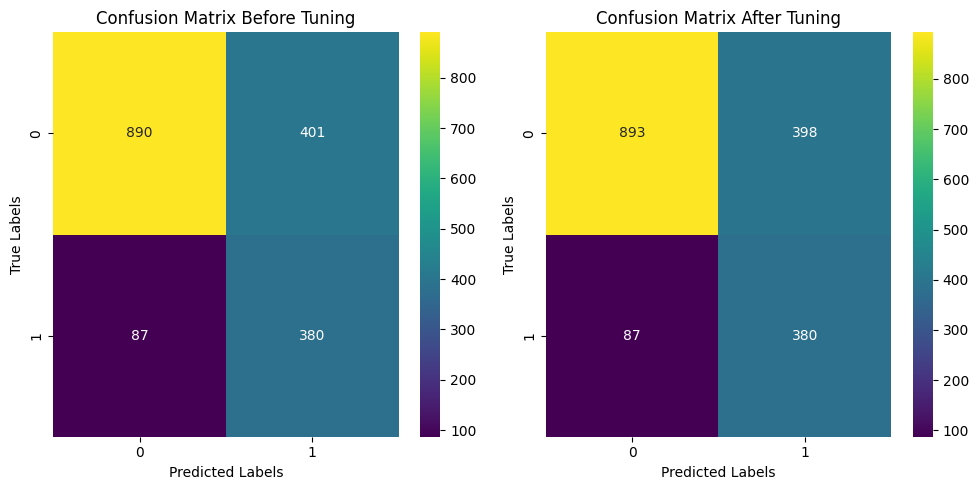

In [84]:
# Plot the confusion matrix heatmaps
cm_before = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_after = confusion_matrix(y_test, y_pred_logreg_tuning, labels=logreg_tuning.classes_)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


sns.heatmap(cm_before, annot=True, cmap="viridis", fmt="d", ax=axes[0])
axes[0].set_title("Confusion Matrix Before Tuning")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

sns.heatmap(cm_after, annot=True, cmap="viridis", fmt="d", ax=axes[1])
axes[1].set_title("Confusion Matrix After Tuning")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

In [85]:
final_report = classification_report(y_test, y_pred_logreg_tuning)
print(final_report)

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1291
           1       0.49      0.81      0.61       467

    accuracy                           0.72      1758
   macro avg       0.70      0.75      0.70      1758
weighted avg       0.80      0.72      0.74      1758



In [86]:
merged_scores

,Accuracy,Precision,Recall,F1 Score,F2 Score,ROC AUC
Logistic Regression Before Tuning,75.154628,48.655570,81.37045,60.897436,71.725179,75.154628
Logreg After Tuning,75.270817,48.843188,81.37045,61.044177,71.725179,75.154628


Parameter yang terpilih hampir sama seperti defaultnya, hanya beda pada model solver dan metode penaltinya. Ketika sebelum tuning, default parameter adalah 'lbfgs' dan setelah tuning terpilih 'liblinear'. Model penaltinya yang sebelumnya 'l1' atau lasso menjadi 'l2' atau ridge. Bedanya kedua penalti tersebut kalau ridge melakukan penalti kepada fitur mendekati 0 sedangkan lasso sampai 0. Setelah tuning terlihat tidak terjadi kenaikan metric F2, namun precisionnya naik sekitar 0.09 %. Terlihat pada confusion metrik FPnya berkurang 3 customer. Dengan demikian, kita akan memilih model setelah dilakukan hyperparameter tuning.


#### F.5 Save Model

In [87]:
import pickle

# Save Model
filename = 'model_churn_pred.sav'
pickle.dump(logreg_tuning, open(filename, 'wb'))

#### F.6 Model Overview

Dari hasil proses pembuatan model, diketahui bahwa model terbaik adalah:
- Imbalance handling dengan teknik resampling Oversampling SMOTEENN
- Model menggunakan LogisticRegression dengan parameter terpilih setelah tuning:
    - C = 1,
    - max_iter = 100,
    - penalty = l2,
    - solver = liblinear

- Model terpilih hanya dapat digunakan pada data dengan nilai atau isi setiap variabel berikut / penggunaannya menjadi tidak valid jika nilai datanya diluar jangkauan ini:
- Model Limitasi:
    - tenure: 1 hingga 72
    - MonthlyCharges: 18.25 hingga 118.75
    - SeniorCitizen: 1 hingga 88
    - InternetService: Fiber optic/ DSL /No (atau tidak keduanya)
    - Contract: Month-to-month/ One year / Two year
    - PaymentMethod: Electronic check/ Mailed check/ Bank transfer (automatic)/ Credit card (automatic)
- Penggunaan Model:
Model ini dapat digunakan sebulan sekali ketika melihat customer yang akan habis masa berlangganan terhadap suatu layanan sesuai dengan kontrak yang didaftarkan

#### F.7 Feature Importances

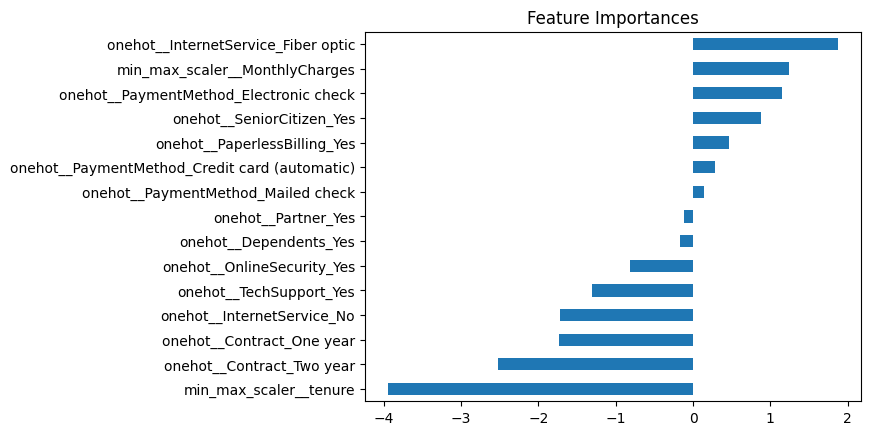

In [88]:
# Checking Feature Importances
feature_names = transformer.get_feature_names_out()
coef = pd.Series(logreg_tuning['model'].coef_[0], feature_names).sort_values()
coef.plot(kind='barh', title='Feature Importances')
plt.show()


Pengaruh Positif: (Berpengaruh ke prediksi label 1 : Churn)

Fitur Internet Service (Fiber Optic) dan Monthly Charges memiliki koefisien positif tertinggi, menunjukkan bahwa pelanggan dengan layanan internet fiber optik atau biaya bulanan yang lebih tinggi lebih cenderung untuk Churn.

Pengaruh Negatif: (Berpengaruh ke prediksi label 0 : Retained)

Secara khusus, tenur yang lebih lama dan kontrak sangat terkait dengan bertahannya suatu customer, mencerminkan loyalitas dan kepuasan pelanggan seiring waktu.

Pembahasan ini menekankan pentingnya meninjau penetapan harga dan kualitas layanan internet fiber optik. Pengaruh negatif yang kuat dari tenur dan jenis kontrak pada perpindahan juga menunjukkan bahwa mendorong kontrak jangka panjang bisa menjadi strategi yang layak untuk meningkatkan retensi pelanggan.

#### F.8 Business Overview
##### Perhitungan Biaya Promosi atau Retensi Untuk Mencegah Customer Churn

Menurut Pernyataan Masalah, menurut data statistik bisnis "Biaya mempertahankan pelanggan yang sudah ada jauh lebih rendah daripada biaya mendapatkan pelanggan baru". Selain itu, menurut sumber tersebut, disebutkan bahwa Biaya mendapatkan pelanggan baru adalah 5 sampai 7 kali lebih tinggi daripada biaya mempertahankan pelanggan yang sudah ada(sumber: [Forbes](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/?sh=29fef7c81c7d)). Oleh karena itu, pernyataan ini akan digunakan sebagai referensi dalam mensimulasikan Biaya Marketing.

Simulasi Pengeluaran Biaya:

Total Customer yang habis masa berlangganan produknya dibulan depan : 1758 Customer

True Positive (TP): Pelanggan yang model mengidentifikasi dengan benar akan churn. Tim Marketing ingin mempertahankan pelanggan ini dengan menawarkan promo, yang akan menimbulkan biaya retensi.

Biaya: TP * Biaya Promosi = TP * $1

True Negative (TN): Pelanggan yang model mengidentifikasi dengan benar tidak akan churn. Tidak ada tindakan yang diperlukan untuk pelanggan ini dari perspektif retensi atau akuisisi.

Biaya: 0 (Tidak Ada Biaya)

False Positive (FP): Pelanggan yang model mengidentifikasi dengan salah akan churn, tetapi sebenarnya tidak churn. Perusahaan mungkin mengeluarkan uang untuk mempertahankan pelanggan ini secara tidak perlu.

Biaya: FP * Biaya Promosi = FP * $1

False Negative (FN): Pelanggan yang model mengidentifikasi dengan salah tidak akan churn, tetapi sebenarnya churn. Perusahaan perlu mendapatkan pelanggan baru untuk menggantikan pelanggan yang churn ini, yang akan menimbulkan biaya akuisisi. Biaya akuisisi yang digunakan 5 kali lipat dari retensi.

$Biaya: FN * Biaya Akuisisi = FN * $5$

Pertama, Mari hitung Pengeluaran Biaya tanpa model:

Mari kita anggap semuanya sebagai potensi churn, itulah mengapa kita akan mencoba mempertahankan mereka. Kita dapat menghitung total pelanggan dalam data uji dengan:

Jumlah Total Customer * $1 = $1728

Pengeluaran Biaya Dengan model:

Dengan menggunakan model ML ini, kita hanya akan mencoba mempertahankan beberapa pelanggan yang diprediksi akan churn sementara yang lain akan diperlakukan seperti biasa.

Formula untuk menghitung pengeluaran biaya untuk pelanggan tertentu adalah:

Total Biaya = (TP * Biaya Promosi) + (FP * Biaya Promosi) + (FN * Biaya Akuisisi)


Total Biaya = (380 * $1) + (398 * $1) + (87 * $5) = $620 + $272 + $270 = $1213

 $\text{Cost Spent} = \left( \frac{\$1,728 - \$1,213}{\$1,728} \right) \times 100\% \approx -30\%$

## **G. Kesimpulan**

Pada bagian demografi jumlah pelanggan terbanyak yang churn adalah mereka yang tidak mempunyai dependents. Akan tetapi Jika kita melihat dari tingkat churn nya, justru pelanggan yang berumur 65 tahun ke atas (senior citizen) memiliki tingkat churn yang lebih tinggi dibandingkan dengan yang lain.

Pada bagian layanan yang diberikan oleh perusahaan, kita bisa melihat kepuasaan pelanggan terhadap layanan yang mereka pilih. Contohnya, walaupun fiber optic memiliki total jumlah pelanggan terbanyak dibandingkan dengan pilihan lainnya, ia juga yang memiliki tingkat churn yang paling tinggi. Kita dapat melihat adanya kebutuhan internet menggunakan fiber optik yang tinggi akan tetapi layanan tersebut tidak dapat memenuhi kebutuhan pelanggannya. Hal ini dapat kita tindak lanjuti kepada tim terkait untuk memeriksa kembali layanan tersebut.

Berdasarkan informasi akun pelanggan, kita bisa lihat bahwa semakin lama nya pelanggan berlangganan dapat menaikan tingkat loyalitas mereka terhadap perusahaan. Lalu kita juga bisa menyimpulkan adanya sensitivitas pelanggan terhadap jumlah yang mereka harus bayarkan. Beberapa pelanggan ada yang membayar lebih dibandingkan oleh pelanggan yang memiliki total jumlah layanan yang sama. Ini dapat disebabkan oleh penyebaran promosi yang kurang baik.

Secara kesuluruhan, model yang dibangun memiliki kemampuan klasifikasi cukup baik dalam memprediksi dengan benar baik pelanggan yang akan churn maupun yang tidak dengan melihat F2 Score 71.72% dan nilai ROC_AUC sebesar 75.15%. Model dapat mengetahui 69 % pelanggan yang tidak churn dan 81% pelanggan yang akan churn (berdasarkan recall). Namun, model cukup berjuang dalam memprediksi dengan jumlah yang tepat pelanggan yang akan churn yang akan melakukan klaim sebesar 49% (berdasarkan precision) dikarenakan dataset imbalanced.

Berdasarkan contoh hitungan pada business overview, terlihat bahwa dengan menggunakan model, perusahaan dapat meminimumkan biaya promosi/retensi sebesar 30% dibandingkan skenario tidak menggunakan model.

## **H. Rekomendasi dan Saran**

**Untuk Perusahaan**
1. Karena adanya pengaruh lamanya pelanggan berlangganan terhadap loyalitas, tim marketing dapat berfokus kepada orang orang yang memiliki tenure rendah terlebih dahulu
2. Banyaknya layanan yang akan digunakan oleh pelanggan tentu saja akan sesuai dengan kebutuhan mereka, oleh karna itu tim marketing selain memberikan promosi perlu juga mengedukasi pelanggan agar mereka mengetahui keuntungan apa yang mereka dapatkan jika menggunakan layanan tersebut.
3. Memberikan promosi paket layanan bermulai dari gabungan 3 jenis layanan, yang setidaknya didalam paket tersebut ada layanan phone dan internet service, dikarenakan ke dua paket tersebut merupakan dasar dasar dari layanan yang lainnya.

**Terkait Data**
1. Menambahkan kolom tanggal bermulainya berlangganan, hal ini dapat berpengaruh terhadap efisiensi pemakaian machine learning, sehingga tidak perlu memeriksa pelanggan yang memang belum akan habis masa berlanggannya di bulan berikutnya.
2. Pada kolom usia akan lebih baik jika di isi oleh tanggal lahir atau umur pelanggan, sehingga kita dapat mendapatkan insight yang lebih banyak
3. Pada kolom dependents, seharusnya di isi oleh berapa jumlah dependents mereka. Dikarenakan ada kemungkinan perbedaan sifat pelanggan yang tidak memiliki, sedikit, atau banyak dependets.
4. Menambahkan kolom bekerja atau tidaknya dan juga berapa lama mereka telah bekerja, hal ini dapat membantu kita lebih memahami buying power pelanggan.



**Terkait Model**

1. Penambahan data historis yang lebih lama, terutama customer yang churn agar mengurangi imbalance data yang signifikan
2. Model dapat ditingkatkan dengan melakukan tuning hyperparameter dengan nilai yang sudah didapat sebagai referensi dan menambahkan parameter lain
3. Pemilihan teknik resampling lain yang belum digunakan seperti ADASYN (Adaptive Synthetic)
4. Secara rutin pantau kinerja model dan perbarui dengan data untuk menjaga akurasi prediktifnya. Industri telekomunikasi dinamis, dan perilaku pelanggan dapat berubah seiring waktu, memengaruhi faktor-faktor yang mempengaruhi kemungkinan perpindahan.
5. Meskipun regresi logistik telah terbukti menjadi model terbaik sejauh ini, terus eksperimen dengan berbagai algoritma untuk melihat apakah model lain dapat menawarkan kinerja yang lebih baik.